# Описание проекта
Система, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением
транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна
оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

## Идея решения:

1. Создать модель предсказания ДТП (целевое значение — **at_fault (виновник)** в таблице **parties)**
    - Для модели выбрать тип виновника — только машина (**car**).
    - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    - Для моделирования ограничиться данными за 2012 год — они самые свежие.
    - Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.
3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    - Какие ещё факторы нужно учесть?
    - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

### Последовательность действий

#### **Шаг 1. Загрузим таблицы SQL**

Подключимся к базе данных и загрузим таблицы в pandas DataFrame. Для этого используем библиотеку sqlalchemy.

#### **Шаг 2. Проведем первичное исследование таблиц**

- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

#### **Шаг 3. Проведем статистический анализ факторов ДТП**

1. Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица **collisions)**.
    - Создадим sql-запрос;
    - Построим график;
    - Сделаем вывод.
2. Скоро состоится первое совещание рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого мы должны создать подходящие аналитические задачи и поручить их решение коллегам. Примеры задач:
    - Проведите анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать **collisions** и **parties**);
    - Найдите самые частые причины ДТП (таблица **parties**).

3. Создадим не менее шести задач для коллег. Будем опираться на примеры и таблицы.

4. Пропишем порядок решения для двух задач из списка. Реализуем его. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:

- Создадим sql-запрос;
- Построим график;
- Сделаем вывод.

#### **Шаг 4. Создадим модель для оценки водительского риска**

1. Подготовим набор данных на основе первичного предположения заказчика:

    - Выберем тип виновника — только машина (**car**).
    - Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
    - Для моделирования возьмем данные только за 2012 год.
    - Подготовка исходной таблицы должна проводиться с помощью sql-запроса.

2. Проведем первичный отбор факторов, необходимых для модели. Изучим описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП. Аргументируем свой выбор. Например, состояние водителя до начала поездки (трезвость или приём лекарств) не измеряется и не может быть использовано в модели.

3. Проведем статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внесем корректировки, если они нужны. Сделаем вывод.
    - Если необходимо, категоризируем исходные данные, проведем масштабирование.
    - Подготовим обучающую и тестовую выборки.

#### **Шаг 5. Найдем лучшую модель**

1. Смоделируем не менее 3-х типов моделей с перебором гиперпараметров.
2. Выберем метрику для оценки модели, исходя из поставленной бизнесом задачи.
3. Оформим вывод в виде сравнительной таблицы.

#### Шаг 6. Проверим лучшую модель в работе

1. Проведем графический анализ «Матрица ошибок». Выведем полноту и точность на график.
2. Проанализируем важность основных факторов, влияющих на вероятность ДТП.
3. Для одного из выявленных важных факторов проведем дополнительное исследование:
    - Покажем график зависимости фактора и целевой переменной.
    - Предложим, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.


#### Шаг 7. Сделаем общий вывод по модели

- Кратко опишем лучшую модель.
- Сделаем вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?

### Краткое описание таблиц

- **collisions** — общая информация о ДТП.
    Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
- **parties** — информация об участниках ДТП.
    Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице **collisions**. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.
- **vehicles** — информация о пострадавших машинах.
    Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей **collisions** и таблицей **parties**. Если нужен уникальный идентификатор, это case_id and party_number.


In [140]:
from sqlalchemy import create_engine

# Обработка данных:
import pandas as pd
import numpy as np

# Визуализация данных:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap

from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    # Разбиение данных
    train_test_split,

    # Поиск гиперпараметров
    RandomizedSearchCV,

    # Кросс-валидация
    cross_val_score
)

from sklearn.preprocessing import (
    # Кодирование числовых значений
    StandardScaler,
    MinMaxScaler,
    RobustScaler,

    # Кодирование категориальных значение
    OneHotEncoder,
)

# Импорт для создания пайплайна
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Импорт моделей классификации
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Бустинг модель
from catboost import CatBoostClassifier

# Нейронные сети
import torch
import torch.nn as nn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU, Dropout
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.callbacks import EarlyStopping

# Подбор гиперпараметров для бустинг/бейзлайн моделей
from optuna.integration import OptunaSearchCV
from optuna.distributions import (
    IntDistribution,
    FloatDistribution,
    CategoricalDistribution,
)

# Подбор гиперпараметров для нейросетей
import optuna

# Оценка качества модели
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_auc_score,
    auc,
    f1_score
)

# Отключаем предупреждения
import warnings

warnings.filterwarnings("ignore")

In [141]:
tf.__version__

'2.17.0'

In [142]:
# Настройка устройства для нейронных сетей

if torch.cuda.is_available():
    DEFAULT_DEVICE = "cuda"
elif torch.backends.mps.is_available():
    DEFAULT_DEVICE = "mps"
else:
    DEFAULT_DEVICE = "cpu"

# Проверяем устройство
DEFAULT_DEVICE

'mps'

In [143]:
# Настройки для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

In [144]:
import warnings

warnings.filterwarnings("ignore")

## Подключение к базе данных. Загрузка таблицы SQL

Подключимся к базе данных и загрузим таблицы в pandas DataFrame. Для этого используем библиотеку sqlalchemy. После этого, проведем первичное исследование таблиц и статистический анализ факторов ДТП.

In [145]:
# Подключение к базе данных
from db_config_file import db_config

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

engine = create_engine(connection_string)

### Первичное исследование таблиц

Проверим, что все таблицы имеют набор данных, соответствуют условию задачи и имеют общий ключ для связи.

In [146]:
# Объединяем таблицы в один DataFrame, чтобы проверить наличие данных и соответствие условиям задачи.
with open('queries/check.sql', 'r') as file:
    query = file.read()

# Выводим первые 20 строк объединенного DataFrame
pd.read_sql_query(query, engine)

,case_id,db_year,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,...,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,4045721,2021,4045721,3630,san bernardino,10.0,north,0,clear,ramp,...,1,23585,4045721,2,car,0,48.0,had not been drinking,None,0.0
1,4012051,2021,4012051,1950,los angeles,0.0,None,1,clear,None,...,5,2418,4012051,1,road signs,0,32.0,had not been drinking,None,0.0
2,4023631,2021,4023631,3705,san diego,0.0,None,0,clear,None,...,1,4169,4023631,3,road signs,0,12.0,had not been drinking,None,NaN
3,4033356,2021,4033356,1938,los angeles,15.0,east,0,clear,highway,...,7,6115,4033356,2,road signs,0,59.0,had not been drinking,None,0.0
4,4033880,2021,4033880,2601,mono,0.0,None,1,clear,highway,...,3,7097,4033880,1,road signs,1,19.0,not applicable,not applicable,NaN
5,4034016,2021,4034016,1205,humboldt,0.0,None,1,clear,None,...,10,7361,4034016,2,road signs,0,66.0,not applicable,not applicable,0.0
6,4035523,2021,4035523,1942,los angeles,0.0,None,1,clear,None,...,9,8759,4035523,2,road signs,0,56.0,had not been drinking,None,NaN
7,4035939,2021,4035939,1942,los angeles,0.0,None,1,clear,None,...,3,9382,4035939,2,building,1,NaN,had not been drinking,None,0.0
8,4036020,2021,4036020,4006,san luis obispo,33.0,north,0,clear,None,...,3,9482,4036020,2,building,0,20.0,had not been drinking,None,0.0
9,4036038,2021,4036038,0103,alameda,78.0,north,0,raining,None,...,7,9515,4036038,2,road signs,0,44.0,had not been drinking,None,0.0


In [147]:
# Проверяем, можно ли объединить таблицы по party_number
with open('queries/second_check.sql', 'r') as file:
    query = file.read()

# Выводим первые 10 строк объединенного DataFrame
pd.read_sql_query(query, engine)

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,1175713,5305032,2,sedan,manual,3,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
1,1175713,5305032,2,sedan,manual,3,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
2,1175713,5305032,2,sedan,manual,3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
3,1175713,5305032,2,sedan,manual,3,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
4,1175713,5305032,2,sedan,manual,3,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.0
5,1175713,5305032,2,sedan,manual,3,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.0
6,1175713,5305032,2,sedan,manual,3,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN
7,1175713,5305032,2,sedan,manual,3,111,3982068,2,road bumper,0,NaN,not applicable,not applicable,0.0
8,1175713,5305032,2,sedan,manual,3,115,3982076,2,road bumper,0,NaN,None,None,NaN
9,1175713,5305032,2,sedan,manual,3,135,3982892,2,road bumper,0,NaN,not applicable,not applicable,0.0


### Статистический анализ факторов ДТП

1. Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица **collisions)**.
    - Создадим sql-запрос;
    - Построим график;
    - Сделаем вывод.
2. Создадим 6 аналитических задач.
3. Пропишем порядок решения для двух задач из списка и реализуем его.

In [148]:
# Группируем количество ДТП по месяцам
with open('queries/collisions_by_month_check.sql', 'r') as file:
    query = file.read()

# Сохраняем датафрейм
collisions_by_month = pd.read_sql_query(query, engine)

# Выводим датафрейм
collisions_by_month

,month,total_accidents
0,2009-01-01,35062
1,2009-02-01,34480
2,2009-03-01,36648
3,2009-04-01,35239
4,2009-05-01,36916
5,2009-06-01,34202
6,2009-07-01,35161
7,2009-08-01,34508
8,2009-09-01,35555
9,2009-10-01,37835


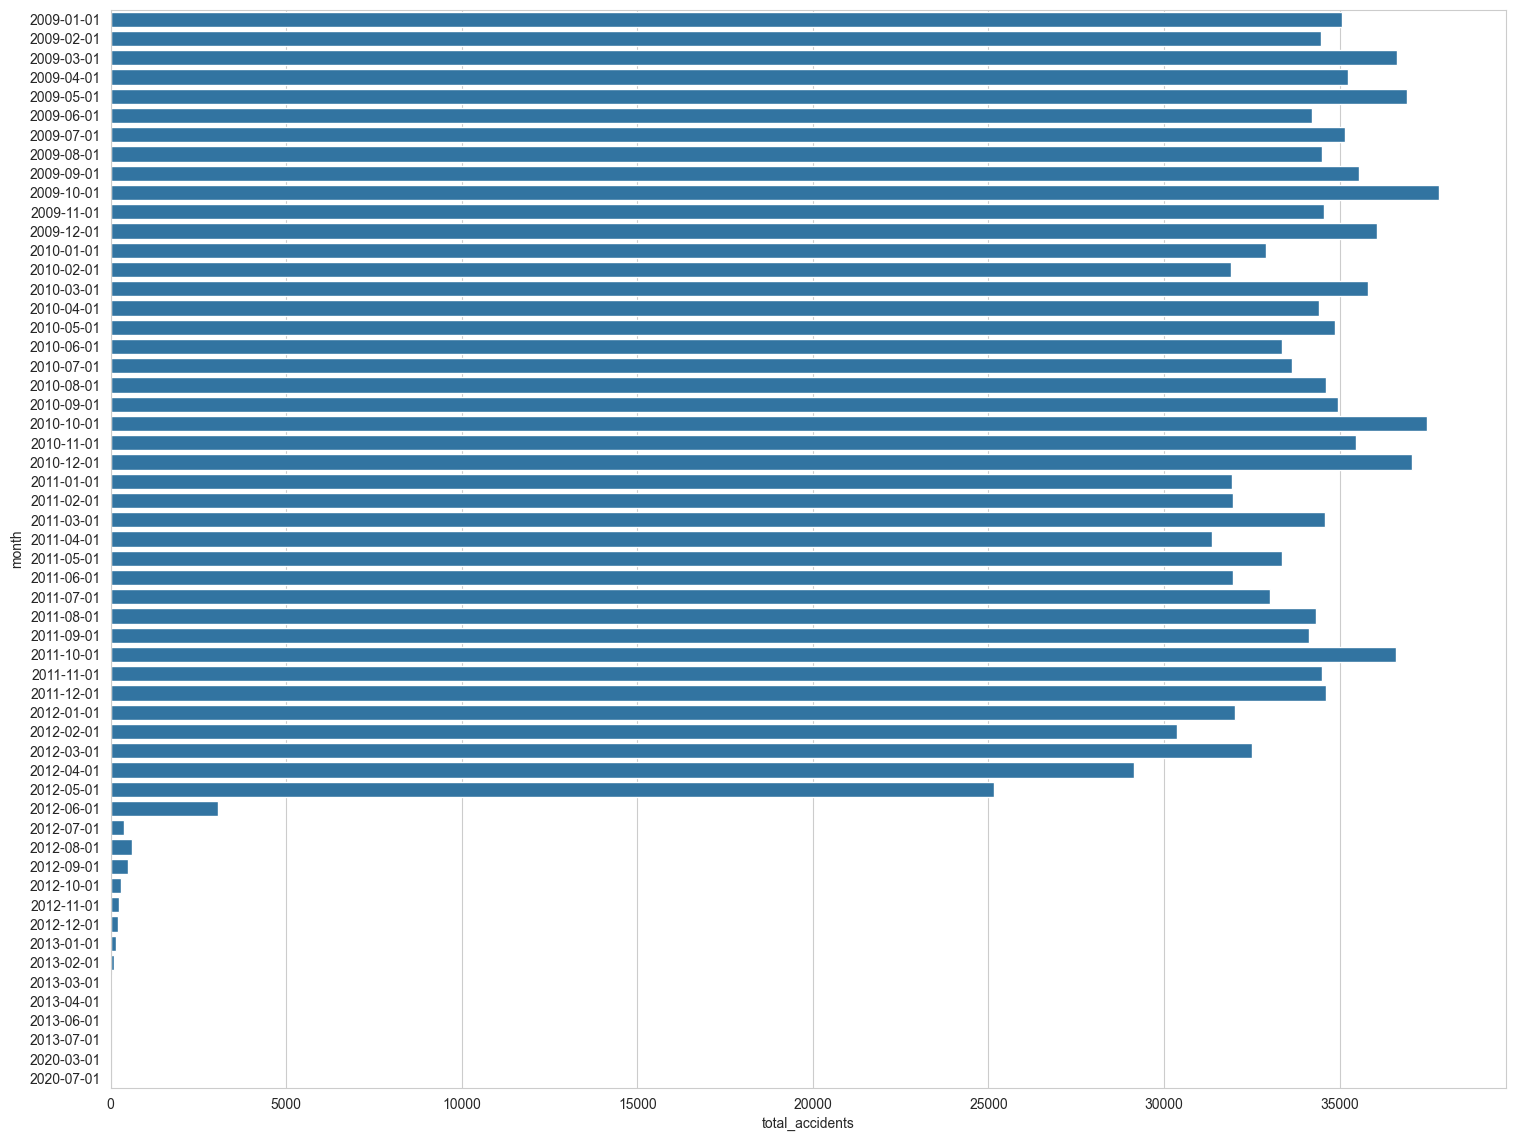

In [149]:
# Рисуем столбчатую диаграмму по месяцам
fig, ax = plt.subplots(figsize=(18, 14))

sns.barplot(
    y='month',
    x='total_accidents',
    data=collisions_by_month,
    ax=ax,
    orient='h'
)

plt.show()

Ограничим данные до июня 2012 года, так как после него слишком мало записей

In [150]:
# Группируем количество ДТП по месяцам
with open('queries/collisions_by_month.sql', 'r') as file:
    query = file.read()

# Сохраняем датафрейм
collisions_by_month = pd.read_sql_query(query, engine)

# Преобразуем столбец 'month' в строку
collisions_by_month['month'] = collisions_by_month['month'].astype(int)
collisions_by_month = collisions_by_month.sort_values('month').astype(str)

collisions_by_month['total_accidents'] = collisions_by_month['total_accidents'].astype(int)

# Выводим датафрейм
collisions_by_month

,month,total_accidents
8,1,99880
1,2,98373
10,3,107036
11,4,101032
0,5,105148
9,6,99531
5,7,101835
6,8,103467
4,9,104649
2,10,111933


In [151]:
print('Медианное количество ДТП', collisions_by_month['total_accidents'].median())
print('Максимальное количество ДТП', collisions_by_month['total_accidents'].max())
print('Общее количество ДТП', collisions_by_month['total_accidents'].sum())

Медианное количество ДТП 103992.0
Максимальное количество ДТП 111933
Общее количество ДТП 1245146


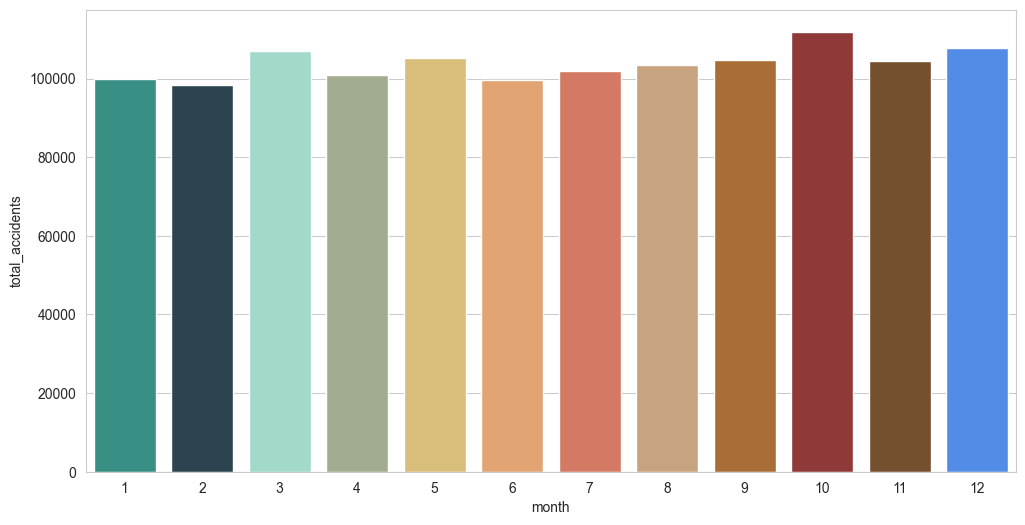

In [152]:
# Рисуем столбчатую диаграмму по месяцам
fig, ax = plt.subplots(figsize=(12, 6))

month_colors = {
    '1': "#2A9D8F",  # Глубокий холодный бирюзовый (зима)
    '2': "#264653",  # Тёмный сине-серый (зима)
    '3': "#99E2D0",  # Светлый бирюзовый (весна) - сохранён
    '4': "#A3B18A",  # Приглушенный оливковый (весна)
    '5': "#E9C46A",  # Мягкий золотистый (весна)
    '6': "#F4A261",  # Тёплый песочный (лето)
    '7': "#E76F51",  # Приглушенный терракотовый (лето)
    '8': "#D4A373",  # Нежный кораллово-бежевый (лето)
    '9': "#BC6C25",  # Тёплый амбровый (осень)
    '10': "#9E2A2B",  # Глубокий винный (осень)
    '11': "#7F4F24",  # Тёмный охра (осень)
    '12': "#3A86FF"  # Яркий ледяной синий (зима)
}

sns.barplot(
    x='month',
    y='total_accidents',
    data=collisions_by_month,
    palette=month_colors,
    ax=ax
)

plt.show()

#### Аналитические задачи

Составим 6 задач и предоставим порядок решения для двух из них.

1. Анализ серьезности повреждений транспортного средства, исходя из состояния дороги в момент ДТП.
2. Количество участников ДТП в зависимости от типа транспортного средства.
3. Количество участников ДТП в зависимости от состояния дороги.
4. Количество ДТП на каждом типе дороги в зависимости от времени суток.
5. Как отличается средняя сумма страховки в зависимости от типа транспортного средства.
6. Как возраст автомобиля влияет на вероятность ДТП.

##### Порядок решения задачи №5

Для того чтобы выяснить, как отличается средняя сумма страховки в зависимости от типа транспортного средства, мы будем использовать таблицы **parties** и **vehicles**.
1. Соединяем таблицы **parties** и **vehicles** по ключам **case_id**. Нам не нужно получать уникальные идентификаторы, так как мы будем использовать только тип транспортного средства и сумму страховки. Плюс ко всему, для каждого участника строки будут дублироваться, со своими значениями.
2. Считаем среднюю сумму страховки.
3. Группируем данные по типу транспортного средства, используя операторы `GROUP BY` или оконную функцию.
4. Сортируем данные по убыванию средней суммы страховки.

In [153]:
# Выводим среднюю сумму страховки по типу транспортного средства
with open('queries/task_5.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,vehicle_type,avg_insurance_amount
0,coupe,39.8
1,other,39.2
2,sedan,37.0
3,hatchback,35.8
4,minivan,32.2


Тип транспорта не сильно влияет на среднюю сумму страховки.

##### Порядок решения задачи №6
1. Отдельным запросом посмотрим минимальный, средний, и максимальный возраст автомобиля в таблице **vehicles**;
2. Соединим таблицы **collisions** и **vehicles** по **case_id**
3. Определим 3 типа возраста автомобиля:
   - новый (до 3 лет);
   - средний (от 3 до 10 лет);
   - старый (более 10 лет).
4. Сгруппируем данные по типу возраста автомобиля и посчитаем количество ДТП для каждого типа, используя оператор `GROUP BY` или оконную функцию.

In [154]:
# Выводим минимальный, средний и максимальный возраст автомобиля
with open('queries/task_6.1.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,min,avg_vehicle_age,max
0,0,5.137088,161


Мы видим, что минимальный возраст автомобиля составляет 0 лет, а максимальный — 161 год. Скорее всего это какой-то раритетный автомобиль, либо же ошибка в данных. Средний же возраст составляет 5 лет. Новым автомобилем будем считать автомобиль до 4 лет, средним — от 4 до 10 лет, старым — более 10 лет.

In [155]:
# Выводим количество ДТП по типу возраста автомобиля
with open('queries/task_6.2.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,vehicle_age_group,total_accidents
0,old,689010
1,middle-aged,572933
2,new,366649


Количество старых автомобилей, участвующих в ДТП, составляет почти вдвое больше, чем количество новых автомобилей. Количество дтп у автомобилей среднего возраста чуть ниже, чем у старых.

In [156]:
# Удаляем ненужные данные
del (
    collisions_by_month,
    query
)

### Вывод:

- Все таблицы имеют набор данных.
- Количество таблиц соответствует условию задачи.
- Общий ключ для связи таблиц — это **case_id** в таблице **collisions** и **parties**, а также **case_id** и **party_number** в таблице **vehicles**.

Мы создали 6 аналитических задач, которые помогут глубже понять данные и выявить закономерности в ДТП. Для двух задач мы прописали порядок решения и реализовали его.

## Загрузка данных

Выгрузим всю таблицу за 2012 год, где тип виновника — только машина (car), а ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина). Определим признаки, которые нужно выгрузить.

Среди всех столбцов совершенно точно не понадобятся:
- **id** — уникальный идентификатор записи;
- **case_id** — уникальный идентификатор ДТП;
- **party_number** — уникальный идентификатор участника ДТП;
- **party_type** — тип участника ДТП (в нашем случае это только car);
- **collision_date** — дата ДТП. У нас задача бинарной классификации. Задача не подразумевает временных рядов, поэтому дата не нужна. Плюс ко всему, мы выгрузили данные только за 2012 год;
- **collision_time** — время ДТП. Аналогично пункту выше;
- **collision_damage** — повреждения транспортного средства. Серьезность происшествия не влияет на вероятность ДТП. Это является последствием ДТП;
- **party_count** — количество участников ДТП. Аналогично, это последствия ДТП;
- **type_of_collision** — тип столкновения. Это тоже последствия ДТП;
- **motor_vehicle_involved_with** — транспортное средство, участвующее в ДТП. Это тоже последствия ДТП. Это может быть важным признаком для модели, однако если мы поставим иную задачу: моделирование вероятности дтп от внешних условий. Грубо говоря, если мы моделируем улицу, и хотим узнать, как построить велодорожки/перекрестны/тротуары/пешеходные переходы, чтобы снизить вероятность ДТП, то этот признак будем для нас важен. Но перед нами стоит задача предсказания вероятности ДТП, основываясь на внутренних факторах — то есть водителе;
- **vehicle_type** — тип транспортного средства, скорее всего нет большой разницы между типами автомобилей, которые участвуют в ДТП, будь то купе, или хэтчбек;
- **vehicle_transmission** — тип трансмиссии. Аналогично предыдущему пункту, разница скорее всего минимальна;
- **party_sobriety** — трезвость водителя. Это важный фактор, так как состояние водителя влияет на вероятность ДТП. Является утечкой целевого признака;
- **party_drug_physical** — трезвость водителя от наркотических веществ. Аналогично пункту выше;
- **primary_coll_factor** — основной фактор аварии. Это основной фактор, который привел к ДТП. Является утечкой целевого признака;
- **pcf_violation_category** — категория нарушения, связанная с основным фактором аварии. Это может быть полезно для понимания, какие нарушения чаще всего приводят к ДТП. С одной стороны это может выглядеть как утечка целевого признака, потому нам надо будет посмотреть, насколько высокая корреляция будет с целевым признаком. Потенциально это поможет нам строить маршрут избегая каких-то факторов, указанных в этом столбце. Является утечкой целевого признака.;

Далее нам необходимо провести корреляционный анализ, чтобы понять, какие факторы больше всего влияют на вероятность ДТП. Потенциально для нас имеют значение следующие столбцы:
- **location_type** — тип дороги так же скорее всего не вносит большой вклад в вероятность ДТП;
- **country_city_location** — номер географического района, где произошло ДТП. Для нас это бы имело значение, если бы мы анализировали ДТП только в одном городе. Однако может быть полезно для оценки риска с учетом маршрута;
- **county_location** — название географического района, где произошло ДТП;
- **lighting** — освещение. Этот признак потенциально может быть очень важен для нас, однако у машины есть свои осветительные приборы;
- **control_device** — в описании данных нет информации, какие данные в этом столбце, но это может быть либо устройство управления, либо устройство контроля. В первом случае это неважный фактор, так как это внешний фактор, а во втором же случае это может быть устройство контроля состояния водителя, как например, алкотестер;
- **insurance_premium** — сумма страховки. Это может быть потенциально важным фактором, так как у неопытных водителей страховка может быть выше, а следовательно косвенно поможет модели делать правильное предсказание;
- **cellphone_in_use** — возможности разговаривать по громкой связи. Потенциально важный фактор, так как отвлекает водителя от дороги.
- **distance** — расстояние от главной дороги в метрах. Для модели данный признак скорее всего не будет иметь значения, однако возможно, он поможет строить маршрут, избегая/прокладывая маршрут через главную дорогу;
- **direction** — направление движения. Скорее всего не имеет значения, однако в задаче сказано оценить риск дтп по выбранному маршруту движения;
- **intersection** — произошло ли ДТП на перекрестке. Это внешний фактор, но может быть это поможет строить маршруты, содержащие меньшее количество перекрестков.
- **accident_hour** — выделим час из столбца с датой происшествия. Потенциально может быть важным признаком. Например, больше ДТП может происходить в ночные часы
- **accident_day** - выделим день из столбца с датой происшествия. Аналогично пункту выше. Например, больше ДТП может происходить в выходные дни


Столбцы, которые совершенно точно понадобятся:
- **vehicle_age** — возраст автомобиля. Это важный фактор, так как старые автомобили могут быть менее безопасными, и сложными в управлении чем новые;
- **road_surface** — состояние дороги. Покрытие дороги сильно влияет на вероятность дтп в купе с состоянием водителя;
- **road_condition** — дорожное состояние. Наличие ям, сыпучего материала, итд сильно влияет на вероятность ДТП;
- **weather_1** — погодные условия. Погода влияет на видимость и состояние дороги, что может привести к ДТП;
- **at_fault** — виновник ДТП. Это целевой признак, который мы будем предсказывать.

В конечном итоге в наш запрос входят следующие столбцы:
- `vehicle_age`
- `location_type`
- `country_city_location`
- `country_location`
- `distance`
- `direction`
- `intersection`
- `weather_1`
- `road_surface`
- `road_condition_1`
- `lighting`
- `control_device`
- `insurance_premium`
- `cellphone_in_use`
- `accident_hour`
- `accident_day`
- `at_fault`

In [157]:
with open('queries/load_df.sql', 'r') as file:
    query = file.read()
# Сохраняем запрос в датафрейм
df = pd.read_sql_query(query, engine)

# df['accident_hour'] = df['accident_hour'].astype(int).astype(str)
# df['accident_day'] = df['accident_day'].astype(int).astype(str)

# Выводим датафрейм
df

,vehicle_age,location_type,county_city_location,county_location,distance,direction,intersection,weather_1,road_surface,road_condition_1,lighting,control_device,insurance_premium,cellphone_in_use,accident_hour,accident_day,at_fault
0,13.0,None,3700,san diego,413.0,east,0.0,clear,dry,normal,daylight,none,86.0,0.0,12.0,4.0,1
1,3.0,None,1900,los angeles,1079.0,north,0.0,clear,dry,normal,daylight,none,53.0,0.0,10.0,0.0,0
2,11.0,highway,1985,los angeles,2534.0,south,0.0,clear,dry,normal,daylight,none,72.0,0.0,13.0,2.0,1
3,6.0,ramp,0112,alameda,0.0,None,0.0,clear,dry,normal,dark with street lights,none,43.0,NaN,18.0,3.0,1
4,6.0,None,2900,nevada,400.0,south,0.0,clear,dry,normal,dark with no street lights,functioning,38.0,0.0,18.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56243,NaN,None,5604,ventura,50.0,north,0.0,clear,dry,normal,daylight,none,33.0,0.0,8.0,1.0,1
56244,4.0,None,0500,calaveras,0.0,None,1.0,clear,dry,normal,dark with no street lights,none,28.0,0.0,2.0,0.0,1
56245,4.0,None,4313,santa clara,73.0,south,0.0,clear,dry,normal,dark with street lights,none,26.0,0.0,2.0,0.0,1
56246,5.0,None,3404,sacramento,0.0,None,1.0,raining,dry,normal,daylight,none,33.0,0.0,18.0,3.0,0


In [158]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_age           54554 non-null  float64
 1   location_type         25932 non-null  object 
 2   county_city_location  56248 non-null  object 
 3   county_location       56248 non-null  object 
 4   distance              56248 non-null  float64
 5   direction             43230 non-null  object 
 6   intersection          56073 non-null  float64
 7   weather_1             56080 non-null  object 
 8   road_surface          55900 non-null  object 
 9   road_condition_1      55999 non-null  object 
 10  lighting              56094 non-null  object 
 11  control_device        56033 non-null  object 
 12  insurance_premium     55701 non-null  float64
 13  cellphone_in_use      51777 non-null  float64
 14  accident_hour         56160 non-null  float64
 15  accident_day       

Не все признаки приведены к нужному типу данных. После обработки пропусков нам надо будет привести некоторые столбцы к целочисленному типу данных. Большинство из них можно будет привести к `int8` для экономии памяти.

### Вывод:

Мы выбрали все данные, которые могут нам понадобиться для обучения модели, и посмотрели, к какому типу данных принадлежат столбцы. После обработки пропусков и данных, приведем все данные к корректному типу данных.

## Предобработка данных

Проведем предобработку данных. Посмотрим на распределения числовых значений, количество пропусков, наличие явных и неявных дубликатов

In [159]:
# Объявим числовые и категориальные столбцы
num_cols = ['vehicle_age', 'distance', 'insurance_premium']
cat_cols = [
    'location_type', 'county_city_location', 'county_location',
    'direction',
    'intersection',
    'weather_1', 'road_surface', 'road_condition_1',
    'lighting',
    'control_device',
    'cellphone_in_use',
    'accident_hour', 'accident_day',
    'at_fault'
]

In [160]:
# Посмотрим на общее количество пропусков в числовых столбцах
df[num_cols].isna().sum()

vehicle_age          1694
distance                0
insurance_premium     547
dtype: int64

In [161]:
# Посмотрим на общее количество пропусков в категориальных столбцах
df[cat_cols].isna().sum()

location_type           30316
county_city_location        0
county_location             0
direction               13018
intersection              175
weather_1                 168
road_surface              348
road_condition_1          249
lighting                  154
control_device            215
cellphone_in_use         4471
accident_hour              88
accident_day                0
at_fault                    0
dtype: int64

### Предобработка числовых столбцов

Посмотрим на распределения столбцов, наличие выбросов, обработаем пропуски

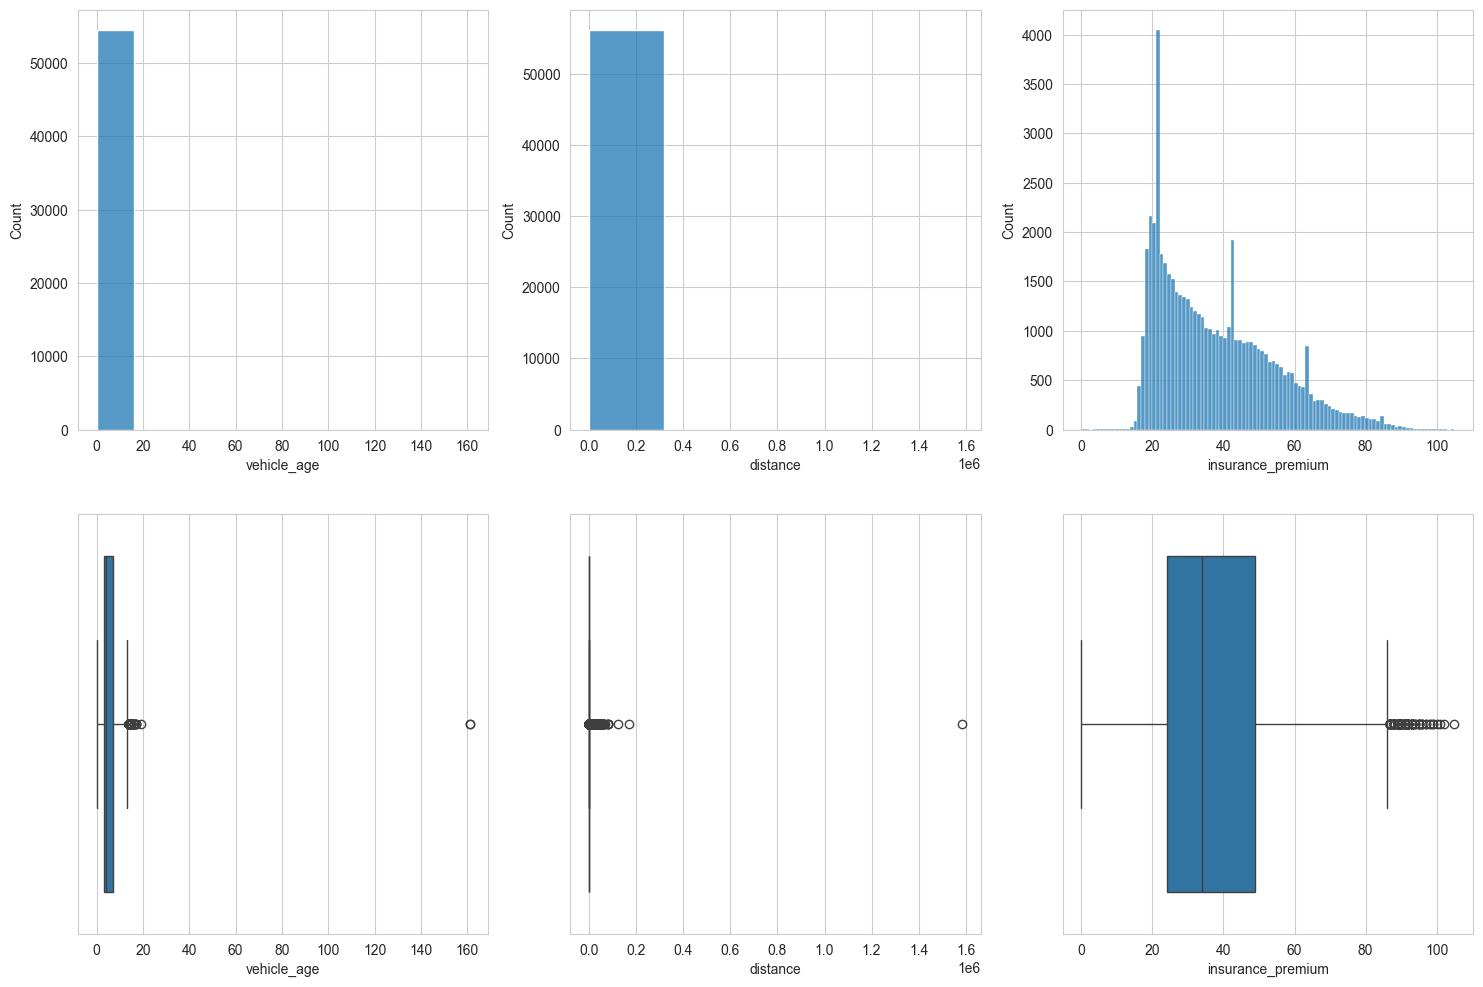

In [162]:
# Рисуем гистограмму и боксплот для числовых столбцов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bins = [10, 5, 100]

for i, col in enumerate(num_cols):
    # Гистограммы
    sns.histplot(df[col],
                 ax=axes[0, i],
                 bins=bins[i], )
    # Боксплот
    sns.boxplot(df[col],
                ax=axes[1, i],
                orient='h')

plt.show()

Мы видим, что у нас есть по одному аномально большому выбросу в столбцах с возрастом и расстоянием. Остальные выбросы лежат "в пределах нормы". Удалим самый большой выброс, чтобы модели было легче обучаться.

In [163]:
# Смотрим на выброс в возрасте авто
df['vehicle_age'].sort_values(ascending=False)

49558    161.0
22228    161.0
9434      19.0
4763      17.0
36662     17.0
         ...  
56140      NaN
56148      NaN
56163      NaN
56214      NaN
56243      NaN
Name: vehicle_age, Length: 56248, dtype: float64

In [164]:
# Сохраняем индексы выбросов
rows_to_drop = df['vehicle_age'].sort_values(ascending=False).index[:4]

# Удаляем строки по индексу
df = df.drop(index=rows_to_drop, axis=0)

# Проверяем, все ли верно мы удалили
df['vehicle_age'].sort_values(ascending=False)

26645    17.0
36662    17.0
101      16.0
1901     16.0
43526    16.0
         ... 
56140     NaN
56148     NaN
56163     NaN
56214     NaN
56243     NaN
Name: vehicle_age, Length: 56244, dtype: float64

In [165]:
# Смотрим на выбросы в дистанции
df['distance'].sort_values(ascending=False)

54391    1584000.0
19921     171600.0
788       124080.0
31520      81312.0
17939      79200.0
           ...    
14816          0.0
14814          0.0
40502          0.0
14809          0.0
28125          0.0
Name: distance, Length: 56244, dtype: float64

In [166]:
# Сохраняем индексы выбросов
rows_to_drop = df['distance'].sort_values(ascending=False).index[:4]

# Удаляем строки по индексу
df = df.drop(index=rows_to_drop, axis=0)

# Проверяем, все ли верно мы удалили
df['distance'].sort_values(ascending=False)

29683    79200.0
17939    79200.0
17927    79200.0
13486    67056.0
10084    64944.0
          ...   
14816        0.0
14814        0.0
40502        0.0
14809        0.0
28125        0.0
Name: distance, Length: 56240, dtype: float64

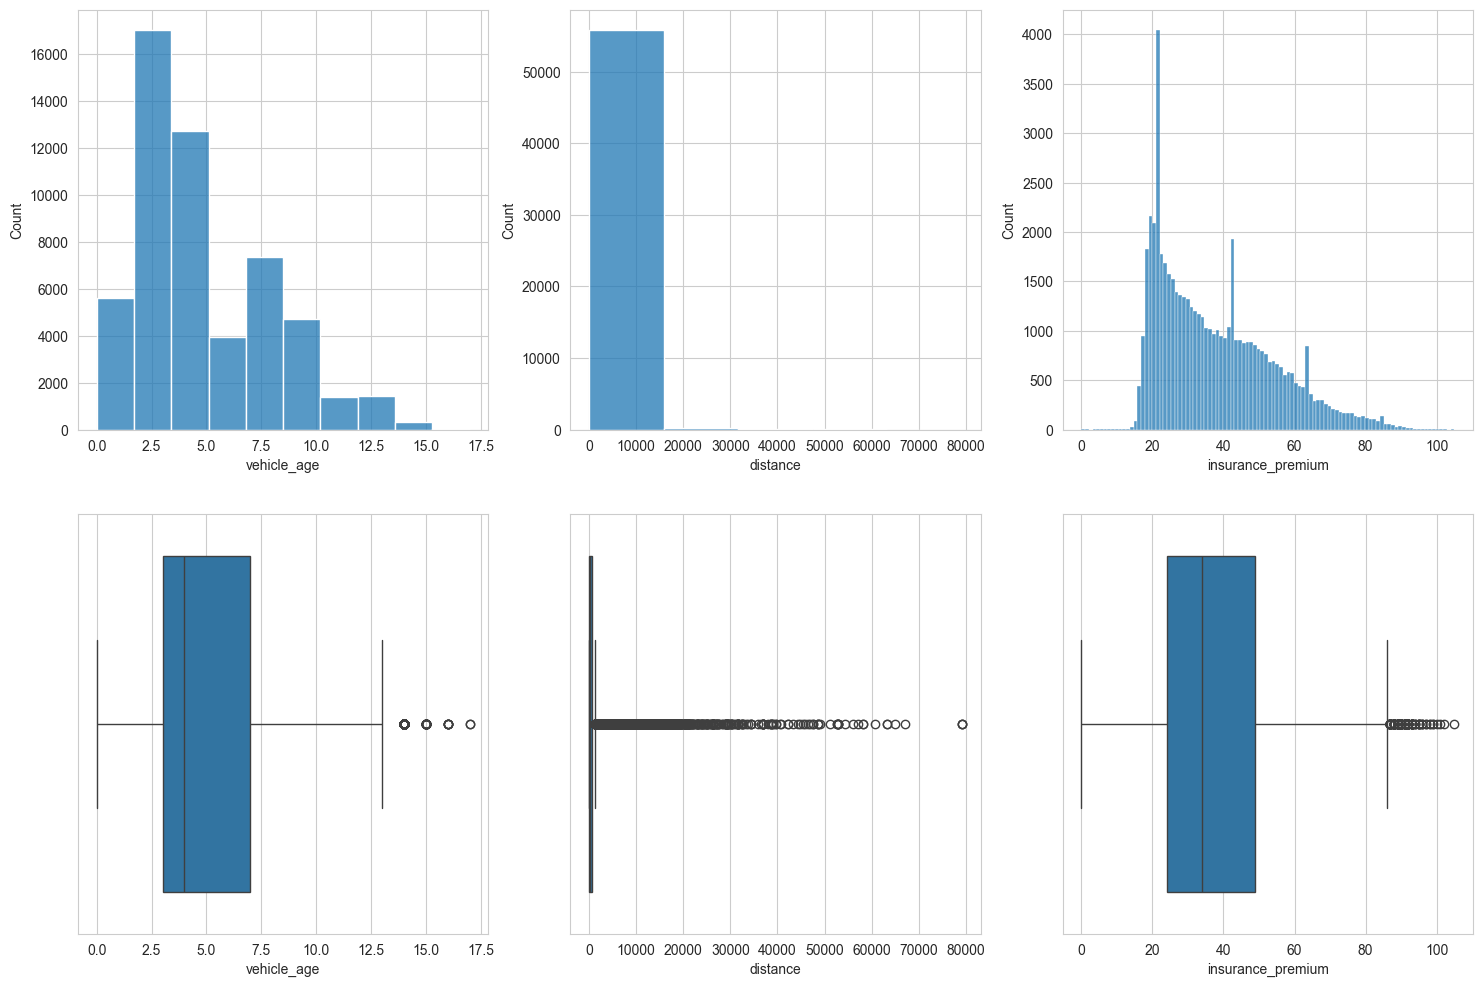

In [167]:
# Рисуем гистограмму и боксплот для числовых столбцов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bins = [10, 5, 100]

for i, col in enumerate(num_cols):
    # Гистограммы
    sns.histplot(df[col],
                 ax=axes[0, i],
                 bins=bins[i], )
    # Боксплот
    sns.boxplot(df[col],
                ax=axes[1, i],
                orient='h')

plt.show()

### Предобработка категориальных столбцов

Проверим наличие явных и неявных дубликатов

In [168]:
# Посмотрим на уникальных значений в категориальных столбцах
df[cat_cols].nunique()

location_type             3
county_city_location    496
county_location          58
direction                 4
intersection              2
weather_1                 7
road_surface              4
road_condition_1          8
lighting                  5
control_device            4
cellphone_in_use          2
accident_hour            24
accident_day              7
at_fault                  2
dtype: int64

Во всех столбцах, кроме `country_city_location` и `country_location` совсем немного уникальных значений. Проверим их на наличие неявных дубликатов

In [169]:
# Выводим уникальные значения в каждом столбце, кроме 'county_city_location', 'country_location'
for col in list(set(cat_cols) - {'county_city_location', 'county_location'}):
    print(col, ':', df[col].unique(), end='\n\n')

lighting : ['daylight' 'dark with street lights' 'dark with no street lights'
 'dusk or dawn' 'dark with street lights not functioning' None]

accident_day : [4. 0. 2. 3. 5. 1. 6.]

intersection : [ 0.  1. nan]

road_surface : ['dry' 'wet' None 'snowy' 'slippery']

location_type : [None 'highway' 'ramp' 'intersection']

road_condition_1 : ['normal' 'loose material' 'obstruction' 'construction' 'reduced width'
 None 'flooded' 'other' 'holes']

control_device : ['none' 'functioning' 'not functioning' None 'obscured']

direction : ['east' 'north' 'south' None 'west']

at_fault : [1 0]

cellphone_in_use : [ 0. nan  1.]

weather_1 : ['clear' 'raining' 'fog' 'cloudy' None 'snowing' 'other' 'wind']

accident_hour : [12. 10. 13. 18. 14.  2. 16. 15. 11.  6.  8. 19.  9. 22. 21.  3. 17.  1.
  4. 20.  7. 23.  0.  5. nan]



Столбцы `intersection` и `location_type` являются сами по себе неявными дубликатами. Столбец `intersection` является булевым и обозначает только то, произошла ли авария на перекрестке. В столбце `location_type` есть значение "intersection". Удалим столбец `intersection`. Предварительно посмотрим, корректно ли заполнены значения.

В столбце `control_device` 'not functioning' обозначает, что средство контроля предусмотрено, просто оно не работает. 'None' — означает, что в транспортном средстве вообще нет средства контроля. Концептуально результат один и тот же, контроль не пройден. Можно объединить эти значения

В столбце `lighting` есть значения 'dark with no street lights' и 'dark with street lights not functioning'. По сути разницы нет, объединим эти значения.

Во всех остальных столбцах неявных дубликатов нет. Большинство пропусков впоследствии мы заполним значением 'unknown', ибо он представлено как "пропуск" в столбцах

In [170]:
# Проверяем, корректно ли заполнены значения
df[['location_type', 'intersection']]

,location_type,intersection
0,None,0.0
1,None,0.0
2,highway,0.0
3,ramp,0.0
4,None,0.0
...,...,...
56243,None,0.0
56244,None,1.0
56245,None,0.0
56246,None,1.0


In [171]:
# Заполняем значения
df.loc[df['intersection'] == 1, 'location_type'] = 'intersection'

# Проверяем, корректно ли теперь все заполнено
df[['location_type', 'intersection']]

,location_type,intersection
0,None,0.0
1,None,0.0
2,highway,0.0
3,ramp,0.0
4,None,0.0
...,...,...
56243,None,0.0
56244,intersection,1.0
56245,None,0.0
56246,intersection,1.0


In [172]:
# Удаляем столбец с перекрестком
df = df.drop('intersection', axis=1)

# Заменяем средство контроля
df['control_device'] = df['control_device'].replace('not functioning', 'none')

# Заменяем освещение
df['lighting'] = df['lighting'].replace('dark with street lights not functioning', 'dark with no street lights')

In [173]:
# Проверяем, корректно ли все привелось
for col in list(set(cat_cols) - {'county_city_location', 'county_location', 'intersection'}):
    print(col, ':', df[col].unique(), end='\n\n')

lighting : ['daylight' 'dark with street lights' 'dark with no street lights'
 'dusk or dawn' None]

accident_day : [4. 0. 2. 3. 5. 1. 6.]

road_surface : ['dry' 'wet' None 'snowy' 'slippery']

location_type : [None 'highway' 'ramp' 'intersection']

road_condition_1 : ['normal' 'loose material' 'obstruction' 'construction' 'reduced width'
 None 'flooded' 'other' 'holes']

control_device : ['none' 'functioning' None 'obscured']

direction : ['east' 'north' 'south' None 'west']

at_fault : [1 0]

cellphone_in_use : [ 0. nan  1.]

weather_1 : ['clear' 'raining' 'fog' 'cloudy' None 'snowing' 'other' 'wind']

accident_hour : [12. 10. 13. 18. 14.  2. 16. 15. 11.  6.  8. 19.  9. 22. 21.  3. 17.  1.
  4. 20.  7. 23.  0.  5. nan]



### Обработка пропусков

В большинстве столбцов заменим пропуски на 'unknown', так как они там уже указаны. Поступим аналогично, и заполним пропуски на это значение в следующих столбцах:
- `location_type`
- `road_surface`
- `cellphone_in_use`
- `weather_1`
- `road_condition_1`
- `lighting`
- `direction`
- `accident_day`
- `accident_hour`

В следующих столбцах заменим пропуски иным образом:
- `control_device` на `none`


Пропуски в числовых столбцах мы заполним медианой

In [174]:
# Заполняем пропуски на unknown
df['location_type'] = df['location_type'].fillna('unknown')
df['road_surface'] = df['road_surface'].fillna('unknown')
df['cellphone_in_use'] = df['cellphone_in_use'].fillna('unknown')
df['weather_1'] = df['weather_1'].fillna('unknown')
df['road_condition_1'] = df['road_condition_1'].fillna('unknown')
df['lighting'] = df['lighting'].fillna('unknown')
df['direction'] = df['direction'].fillna('unknown')
df['accident_day'] = df['accident_day'].fillna('unknown')
df['accident_hour'] = df['accident_hour'].fillna('unknown')

# Заполняем пропуски в оставшихся столбцах
df['control_device'] = df['control_device'].fillna('none')

# Заполняем пропуски в числовых столбцах
df['vehicle_age'] = df['vehicle_age'].fillna(df['vehicle_age'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())
df['insurance_premium'] = df['insurance_premium'].fillna(df['insurance_premium'].median())

In [175]:
# Проверяем, остались ли пропуски
df.isna().sum()

vehicle_age             0
location_type           0
county_city_location    0
county_location         0
distance                0
direction               0
weather_1               0
road_surface            0
road_condition_1        0
lighting                0
control_device          0
insurance_premium       0
cellphone_in_use        0
accident_hour           0
accident_day            0
at_fault                0
dtype: int64

In [176]:
# Преобразуем столбцы к нужному типу данных
df['vehicle_age'] = df['vehicle_age'].astype('int8')
df['distance'] = df['distance'].astype('int64')
df['insurance_premium'] = df['insurance_premium'].astype('int16')
df['at_fault'] = df['at_fault'].astype('int8')

df['accident_day'] = df['accident_day'].astype(int).astype(str)

# Проверяем, корректно ли все перевелось
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56240 entries, 0 to 56247
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vehicle_age           56240 non-null  int8  
 1   location_type         56240 non-null  object
 2   county_city_location  56240 non-null  object
 3   county_location       56240 non-null  object
 4   distance              56240 non-null  int64 
 5   direction             56240 non-null  object
 6   weather_1             56240 non-null  object
 7   road_surface          56240 non-null  object
 8   road_condition_1      56240 non-null  object
 9   lighting              56240 non-null  object
 10  control_device        56240 non-null  object
 11  insurance_premium     56240 non-null  int16 
 12  cellphone_in_use      56240 non-null  object
 13  accident_hour         56240 non-null  object
 14  accident_day          56240 non-null  object
 15  at_fault              56240 non-null  int

In [177]:
# Удаляем ненужные переменны
del (
    rows_to_drop
)

### Вывод:

Все данные были приведены к необходимому типу данных. Пропуски в числовых столбцах мы заполнили медианой. Большинство пропусков в категориальных столбцах были заменены на 'unknown'. В следующих столбцах мы заполнили пропуски следующим образом:
- `control_device` заполнили значением `none`

Во время обработки неявных дубликатов, мы удалили столбец `intesection`, так как он сам по себе являлся неявным дубликатом одного из значений столбца `location_type`.

## Исследовательский анализ данных

In [178]:
def draw_pivot(column: str) -> None:
    """
    Выводит сводную таблицу по выбранному столбцу. Сводная таблица содержит в себе общее количество ДТП и количество ДТП, в которых вина лежит на водителе. Также в ней указаны локальная и глобальная доли, в которых вина лежит на водителе.
    :param column: Название столбца
    :return: None
    """
    # Создаем сводную таблицу для уникального значения, где/почему произошло ДТП
    pivot_df = df.pivot_table(index=column, values='at_fault', aggfunc=('sum', 'count'))

    # Считаем локальную долю ДТП
    pivot_df['local_percent'] = round((pivot_df['sum'] / pivot_df['count']) * 100, 1)

    # Считаем глобальную долю ДТП по уникальному значению от общего числа ДТП
    pivot_df['total_percent'] = round((pivot_df['sum'] / pivot_df['sum'].sum()) * 100, 1)

    # Выводим таблицу
    display(pivot_df)

    # Преобразуем данные в long-формат для seaborn
    melted_df = pivot_df.reset_index().melt(
        id_vars=column,
        value_vars=['local_percent', 'total_percent'],
        var_name='percent_type',
        value_name='percentage'
    )

    # Создаем столбчатую диаграмму
    plt.figure(figsize=(16, 10))
    sns.barplot(
        data=melted_df,
        x=column,
        y='percentage',
        hue='percent_type',
        palette='viridis'
    )

    plt.title(f'Сравнение локальной и общей доли ДТП по {column}')
    plt.xlabel(column)
    plt.ylabel('Процент, %')
    plt.xticks(rotation=45)
    plt.legend(title='Тип процента')
    plt.show()

,count,sum,local_percent,total_percent
location_type,,,,
highway,21120,10380,49.1,36.6
intersection,12714,5655,44.5,19.9
ramp,2774,1562,56.3,5.5
unknown,19632,10769,54.9,38.0


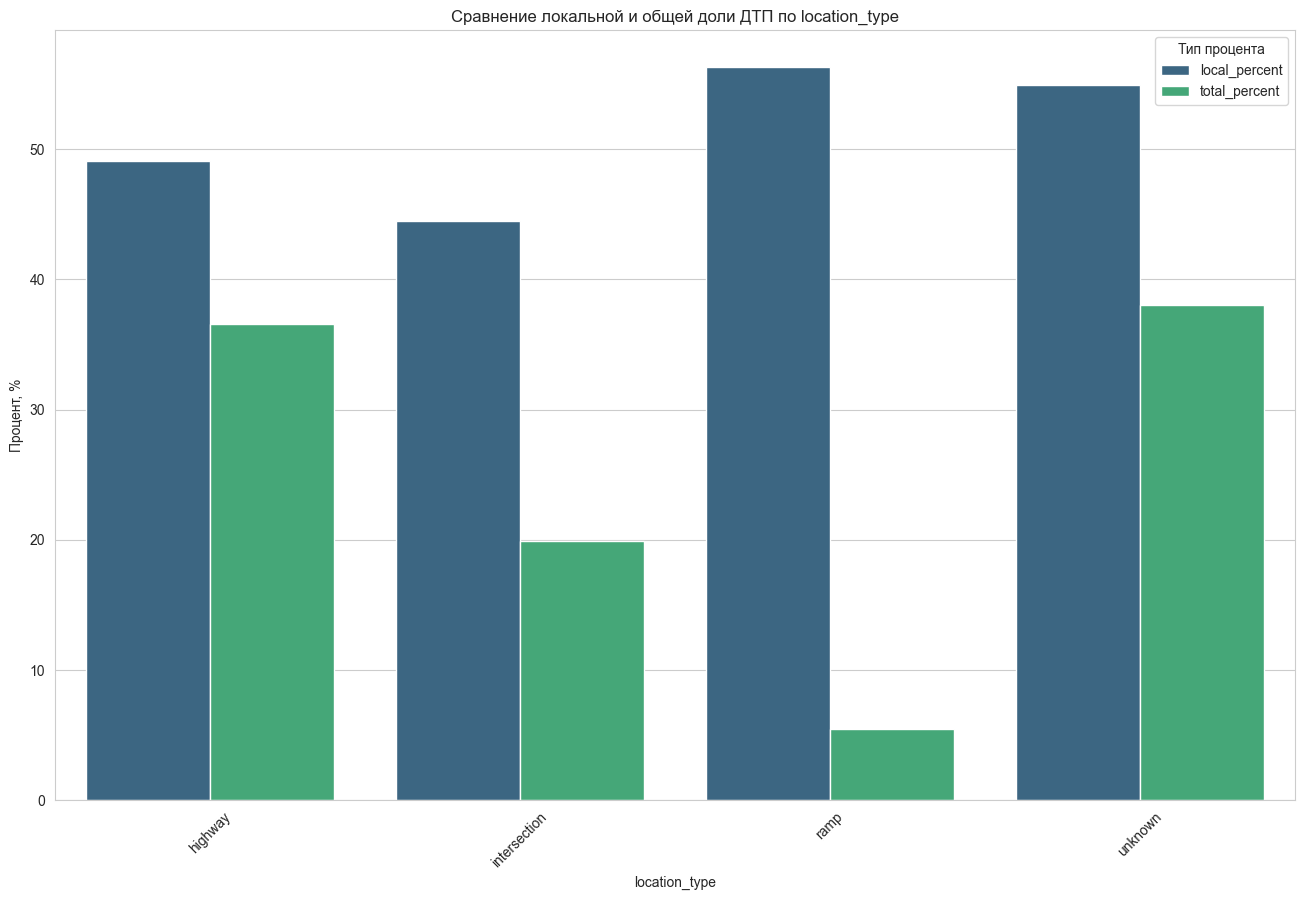

In [179]:
# Рисуем данные для типа локации
draw_pivot('location_type')

,count,sum,local_percent,total_percent
direction,,,,
east,9514,4982,52.4,17.6
north,12126,6338,52.3,22.3
south,11883,6132,51.6,21.6
unknown,13016,5840,44.9,20.6
west,9701,5074,52.3,17.9


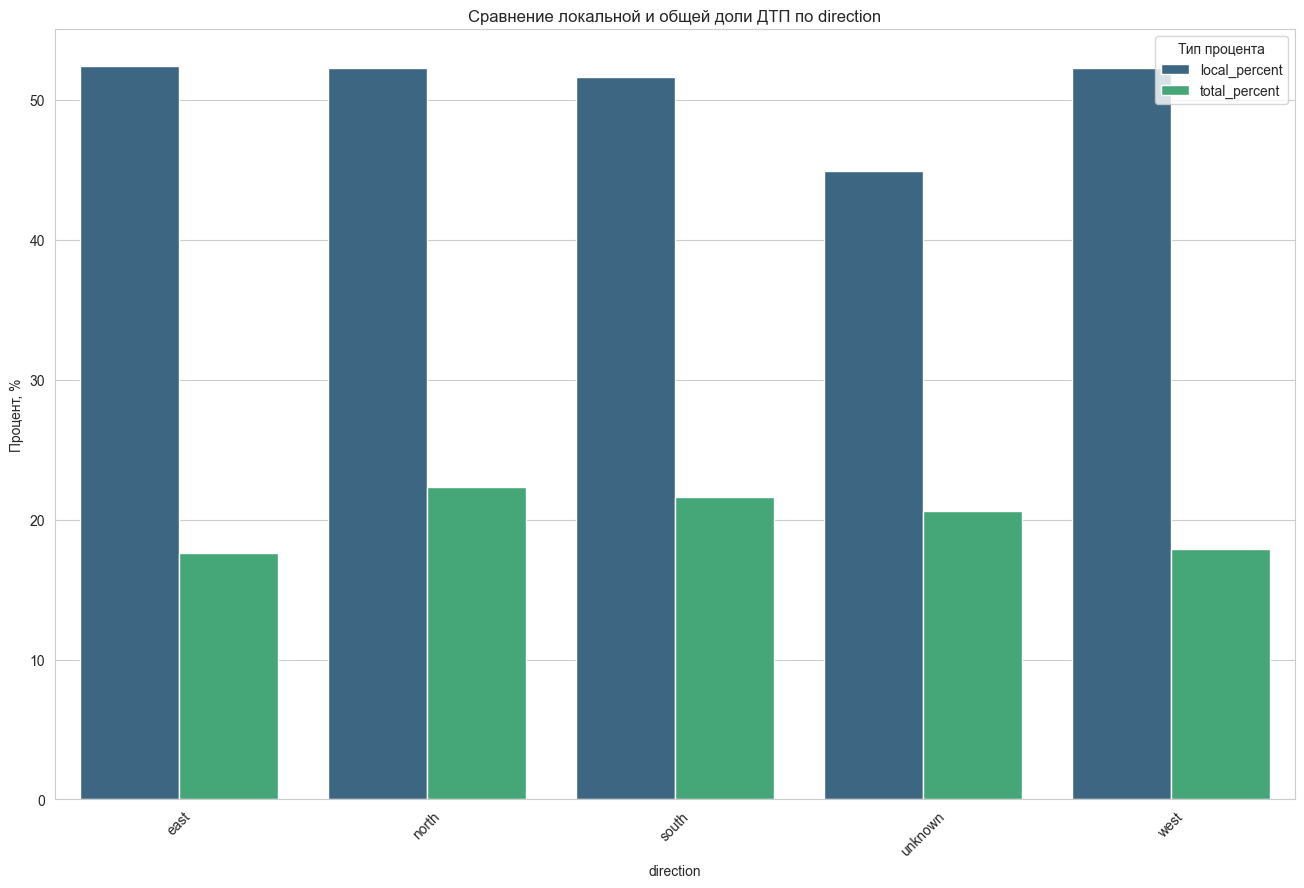

In [180]:
# Рисуем данные для направления
draw_pivot('direction')

,count,sum,local_percent,total_percent
accident_hour,,,,
0.0,1062,710,66.9,2.5
1.0,1139,827,72.6,2.9
2.0,1177,851,72.3,3.0
3.0,708,547,77.3,1.9
4.0,501,368,73.5,1.3
5.0,682,414,60.7,1.5
6.0,1113,637,57.2,2.2
7.0,2545,1255,49.3,4.4
8.0,2514,1225,48.7,4.3


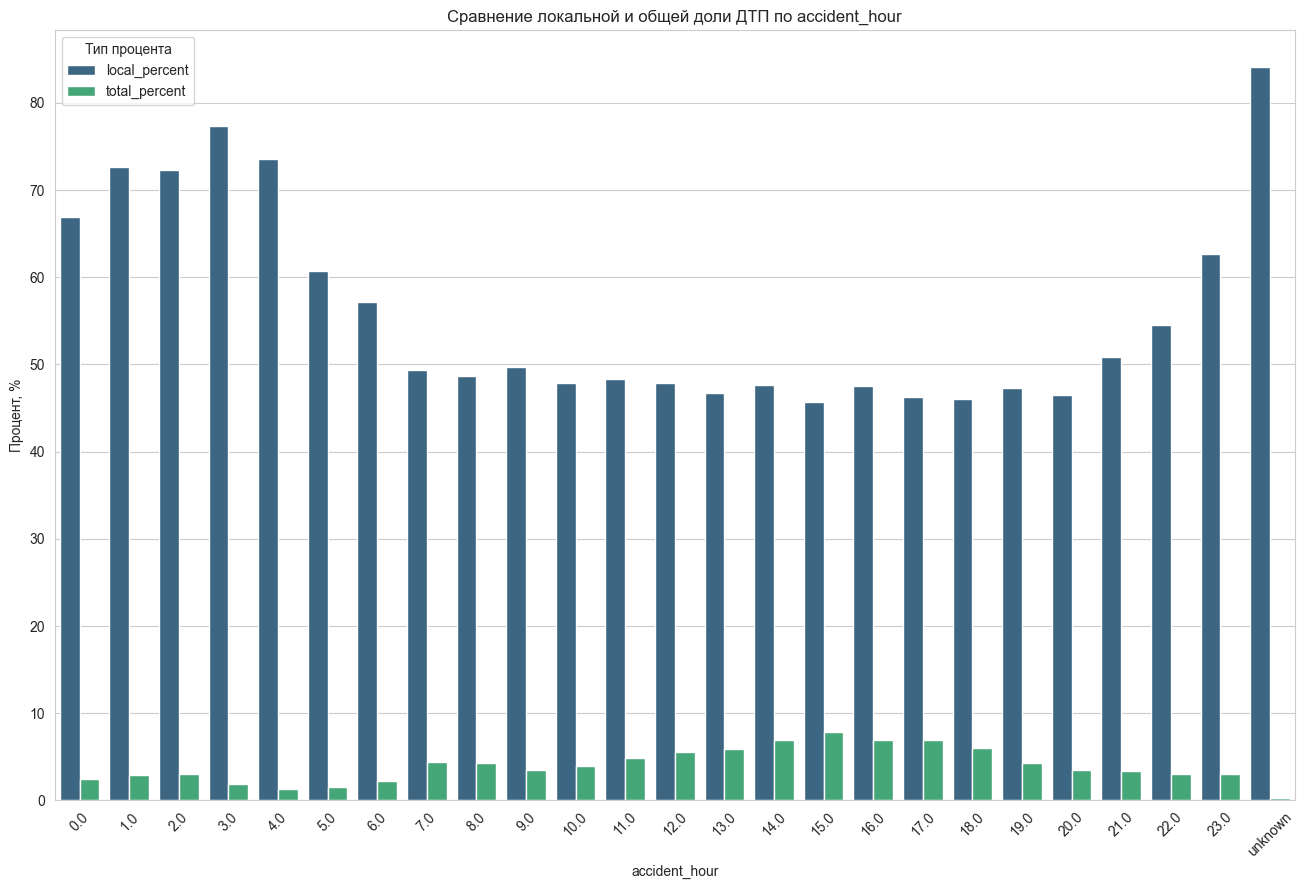

In [181]:
# Рисуем данные для причины ДТП
draw_pivot('accident_hour')

,count,sum,local_percent,total_percent
accident_day,,,,
0,8110,4311,53.2,15.2
1,7066,3599,50.9,12.7
2,7185,3493,48.6,12.3
3,7538,3795,50.3,13.4
4,7690,3783,49.2,13.3
5,9279,4532,48.8,16.0
6,9372,4853,51.8,17.1


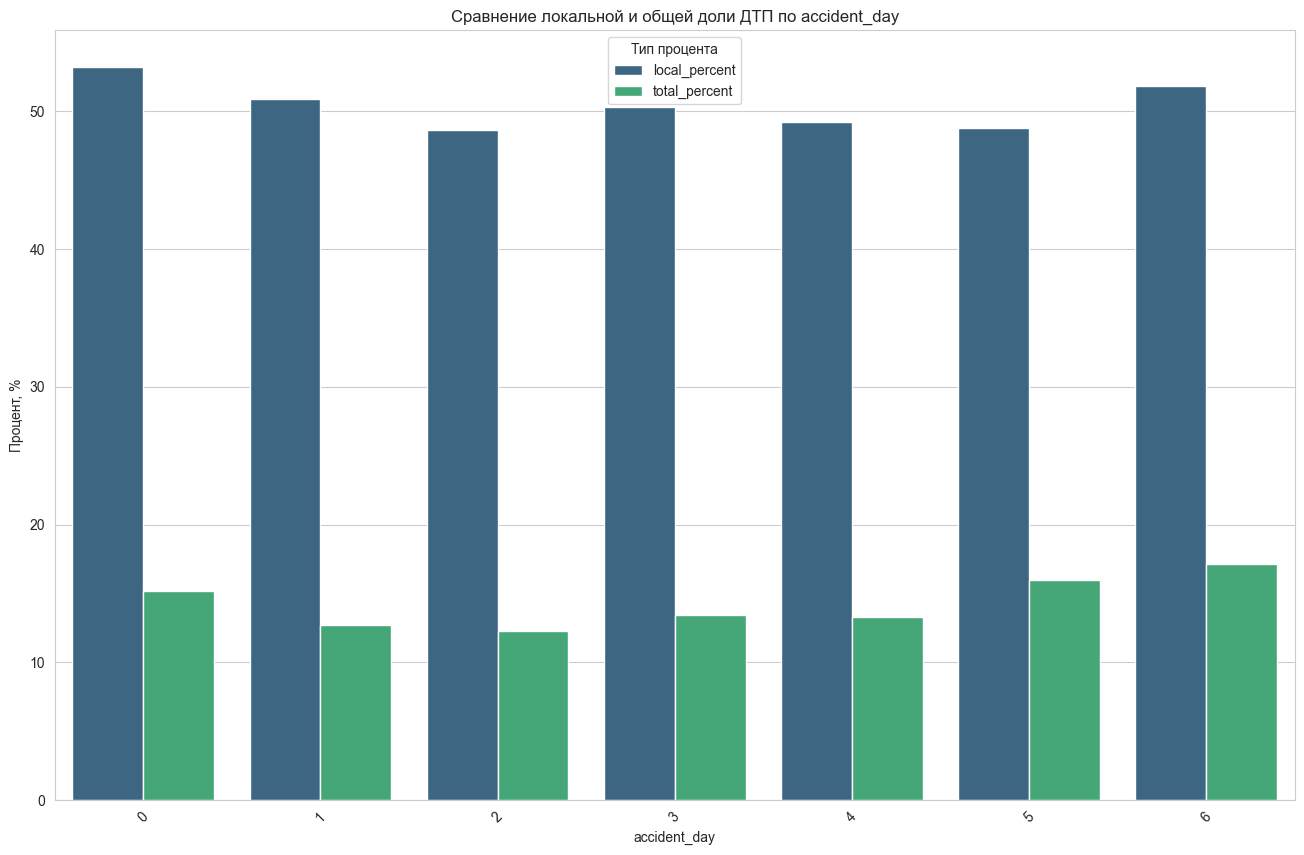

In [182]:
# Рисуем данные для категории нарушения
draw_pivot('accident_day')

,count,sum,local_percent,total_percent
road_condition_1,,,,
construction,1003,467,46.6,1.6
flooded,32,23,71.9,0.1
holes,222,111,50.0,0.4
loose material,128,82,64.1,0.3
normal,54058,27286,50.5,96.2
obstruction,248,127,51.2,0.4
other,228,127,55.7,0.4
reduced width,72,44,61.1,0.2
unknown,249,99,39.8,0.3


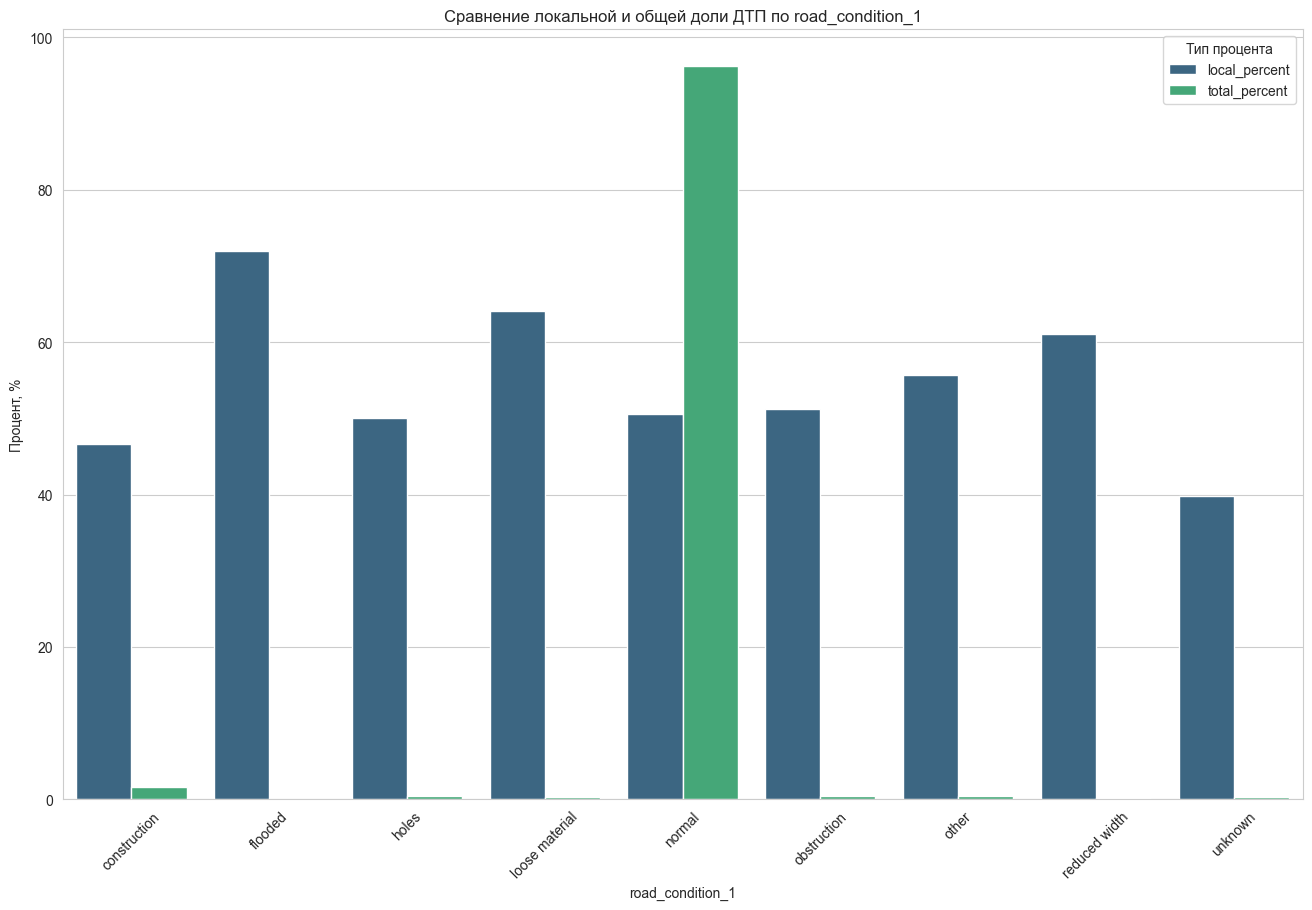

In [183]:
# Для состояния дороги
draw_pivot('road_condition_1')

,count,sum,local_percent,total_percent
road_surface,,,,
dry,50236,24824,49.4,87.5
slippery,43,22,51.2,0.1
snowy,357,256,71.7,0.9
unknown,348,159,45.7,0.6
wet,5256,3105,59.1,10.9


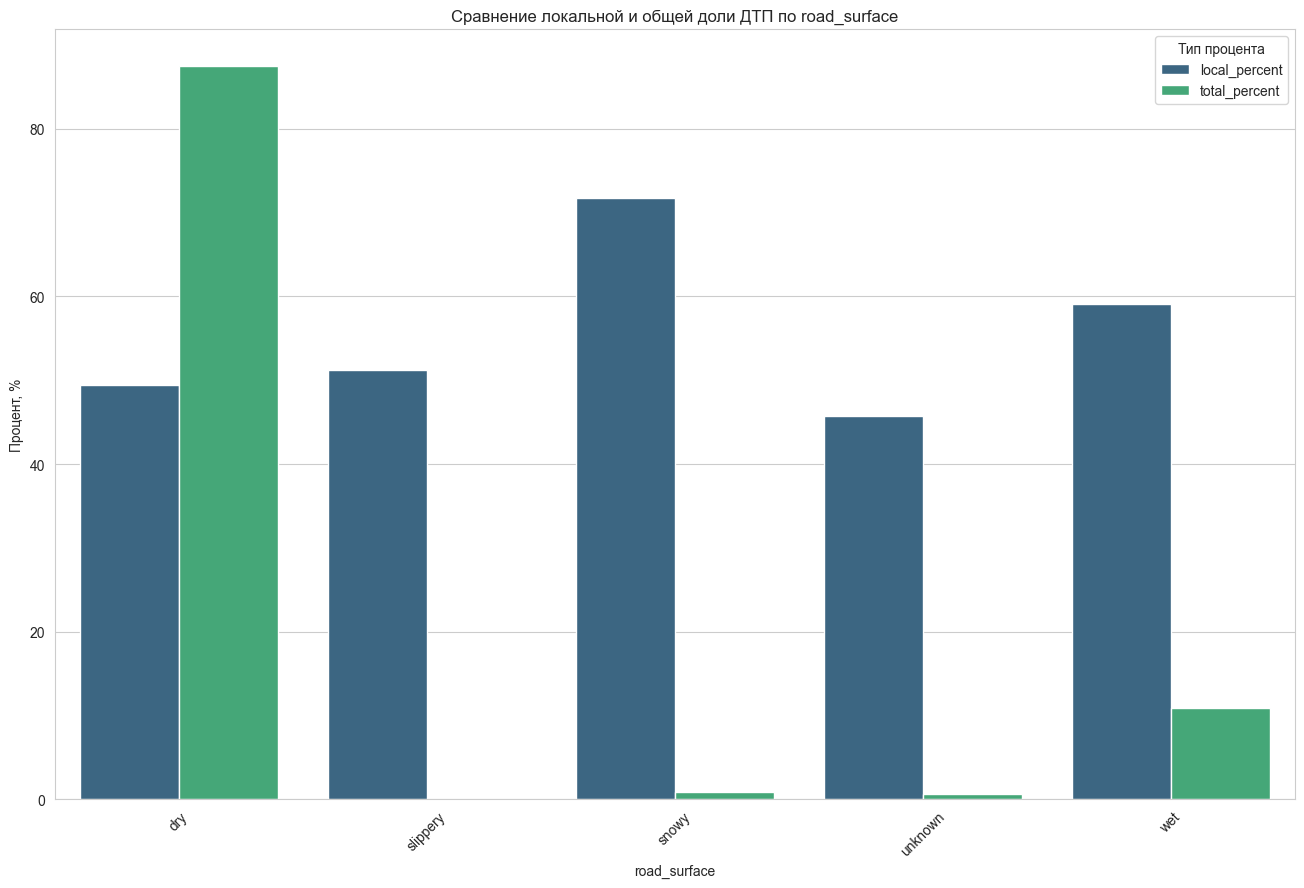

In [184]:
# Рисуем данные для типа поверхности дороги
draw_pivot('road_surface')

,count,sum,local_percent,total_percent
weather_1,,,,
clear,45086,22233,49.3,78.4
cloudy,8426,4558,54.1,16.1
fog,181,108,59.7,0.4
other,34,23,67.6,0.1
raining,2177,1263,58.0,4.5
snowing,157,107,68.2,0.4
unknown,168,68,40.5,0.2
wind,11,6,54.5,0.0


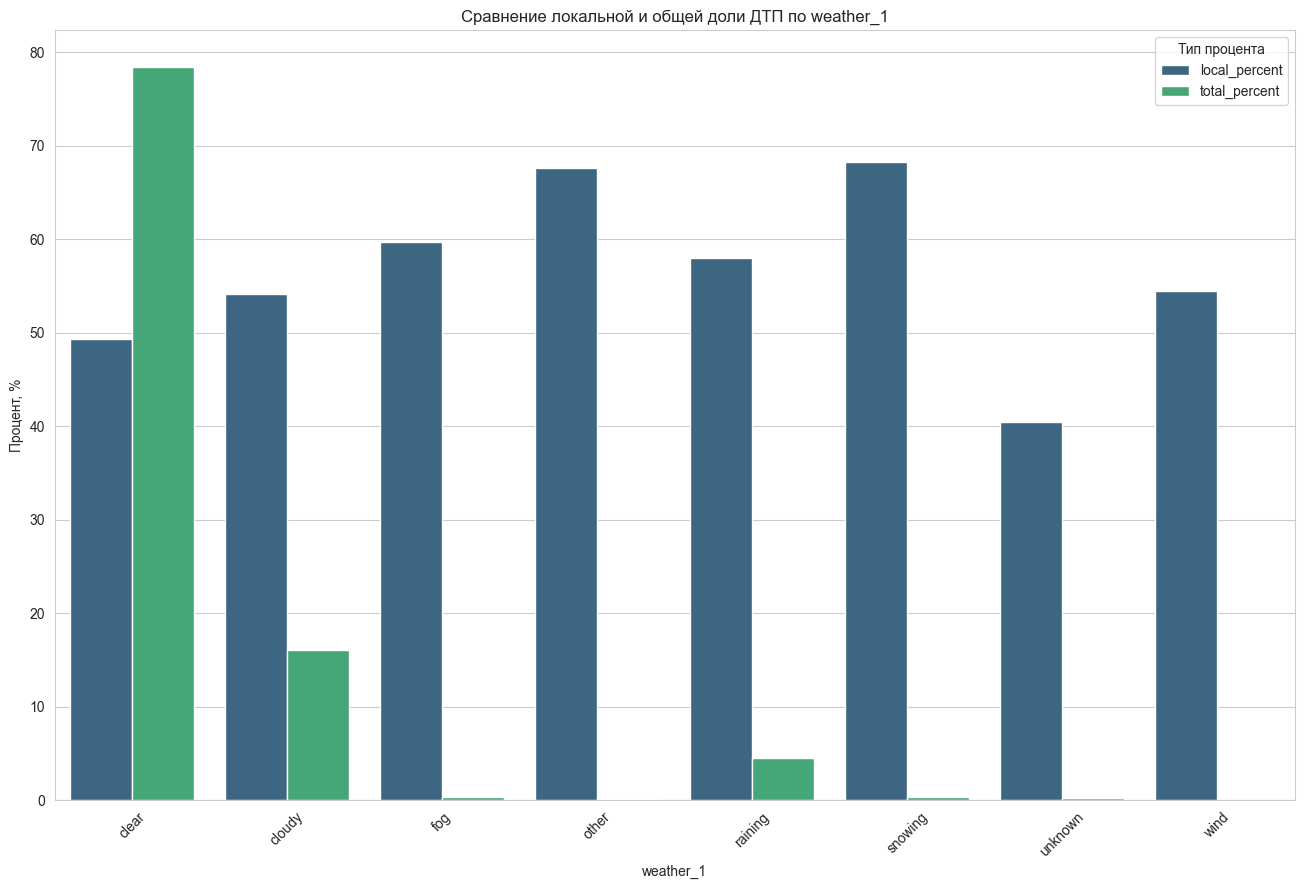

In [185]:
# Рисуем данные для типа погоды
draw_pivot('weather_1')

,count,sum,local_percent,total_percent
lighting,,,,
dark with no street lights,5244,3279,62.5,11.6
dark with street lights,11016,5888,53.4,20.8
daylight,38059,18264,48.0,64.4
dusk or dawn,1767,870,49.2,3.1
unknown,154,65,42.2,0.2


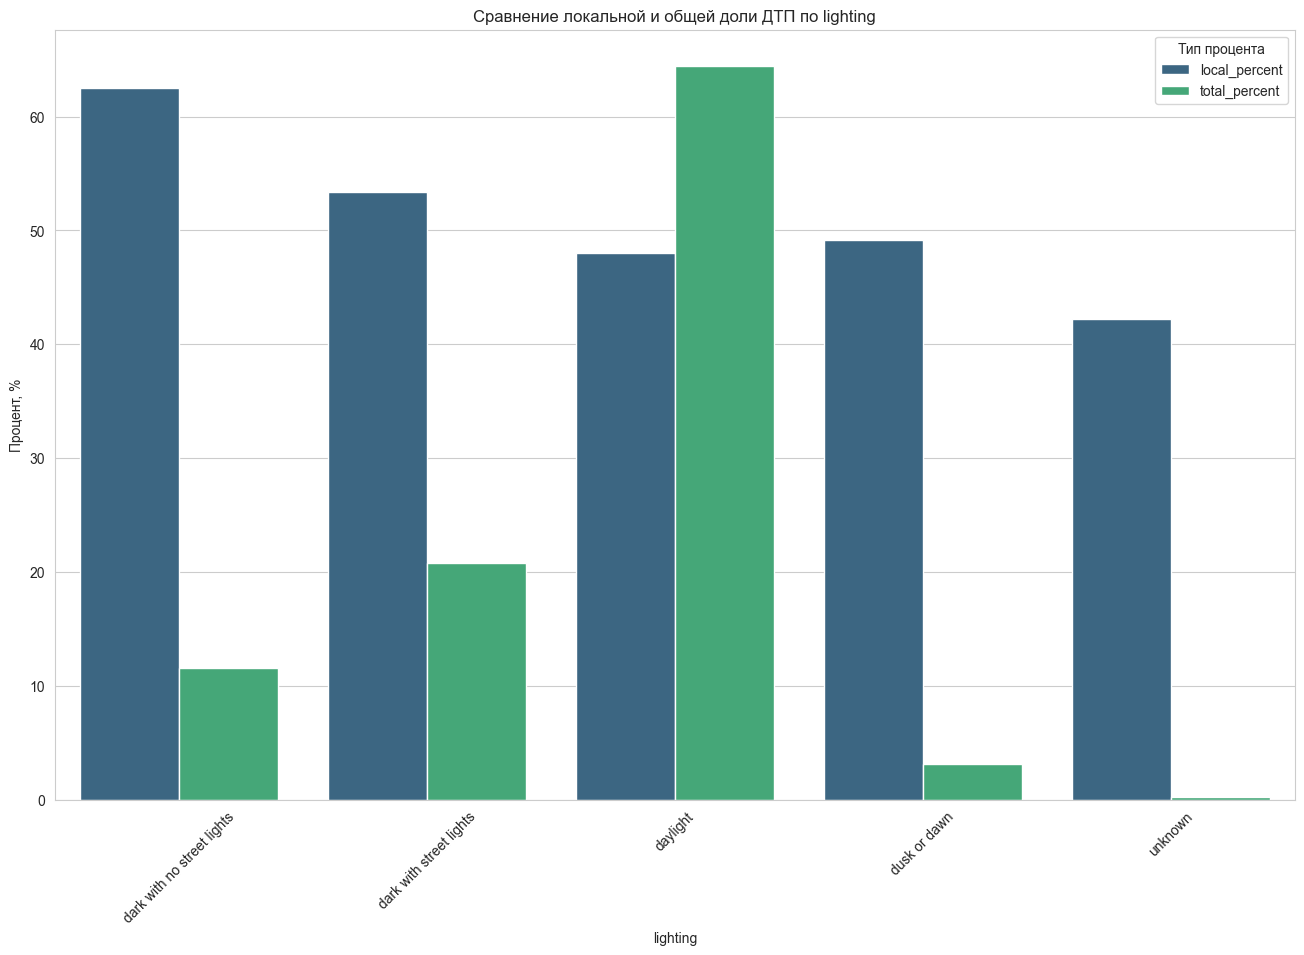

In [186]:
# Рисуем данные для типа освещения
draw_pivot('lighting')

,count,sum,local_percent,total_percent
control_device,,,,
functioning,18307,8138,44.5,28.7
none,37904,20214,53.3,71.3
obscured,29,14,48.3,0.0


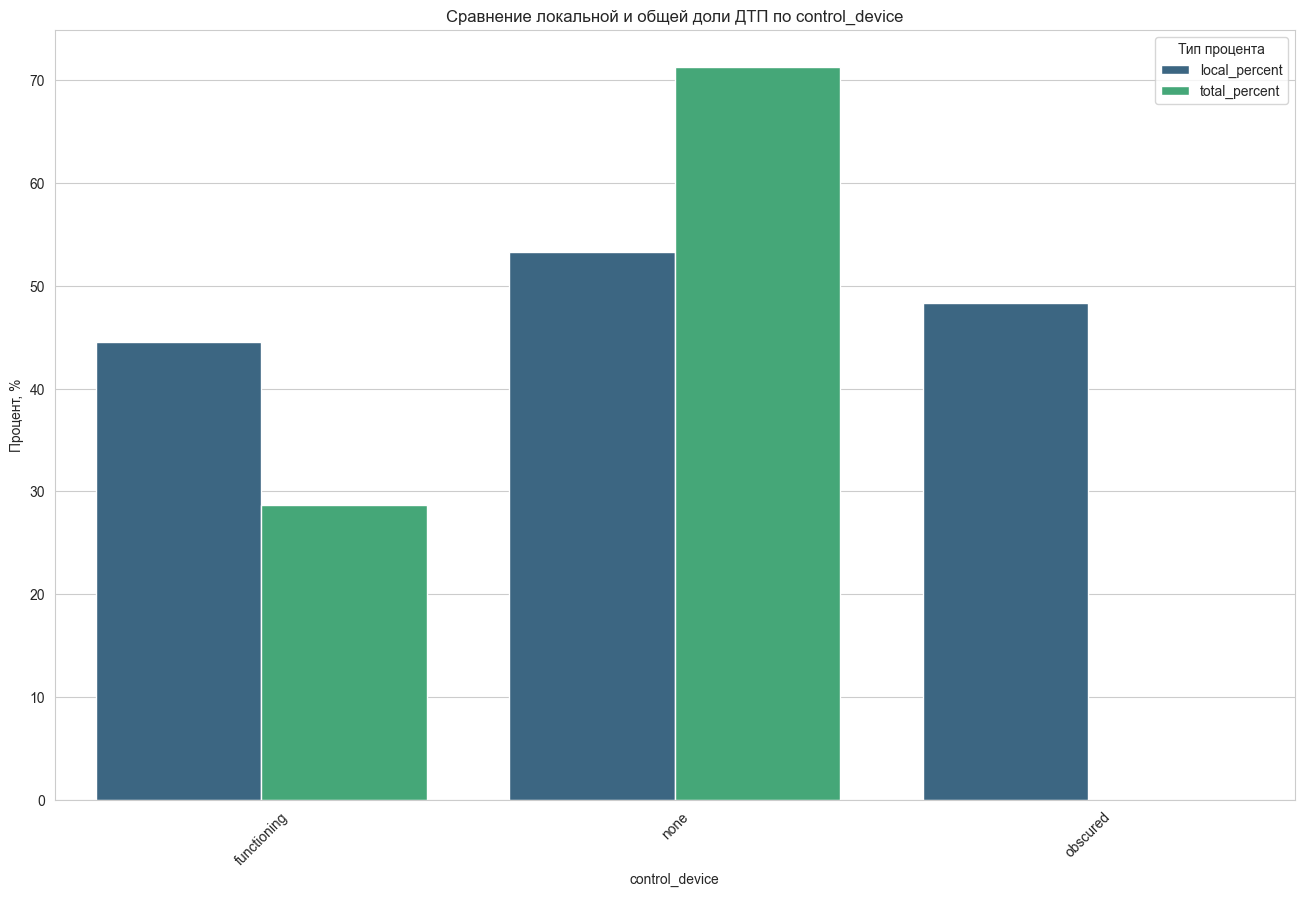

In [187]:
# Рисуем данные для типа проверяющего устройства
draw_pivot('control_device')

### Вывод:

- `location_type` — в этом столбце у нас нет никаких примечательных результатов. Можно отметить только то, что меньше всего ДТП происходит на ramp
- `direction` — в этом столбце у нас так же нет ничего примечательно. Направление. никаким образом не влияет на ДТП
- `road_condition_1` — в этом столбце нет ничего примечательного, скорее всего он не будет важен для модели
- `road_surface` — в этом столбце так же ничего примечательного, большинство ДТП происходит на сухой дороге, остальные на влажной. Скорее всего для модели этот признак так же будет бесполезен
- `weather` — в этом столбце  так же ничего примечательного. Большинство ДТП происходит в ясную погоду, часть в облачную и часть в дождь. Скорее всего бесполезен для модели
- `lightning` — в этом столбце можно отметить, что большинство ДТП происходит в дневное время. Остальные данные можно объединить в "night". Даже "unknown" так как общая доля таких ДТП в районе 1%
- `control_device` — в этом столбце нет ничего примечательного, скорее всего бесполезен для модели
- `accident_day` — здесь так же нет ничего примечательного
- `accident_day` — здесь так же нет ничего примечательного

## Корреляционный анализ

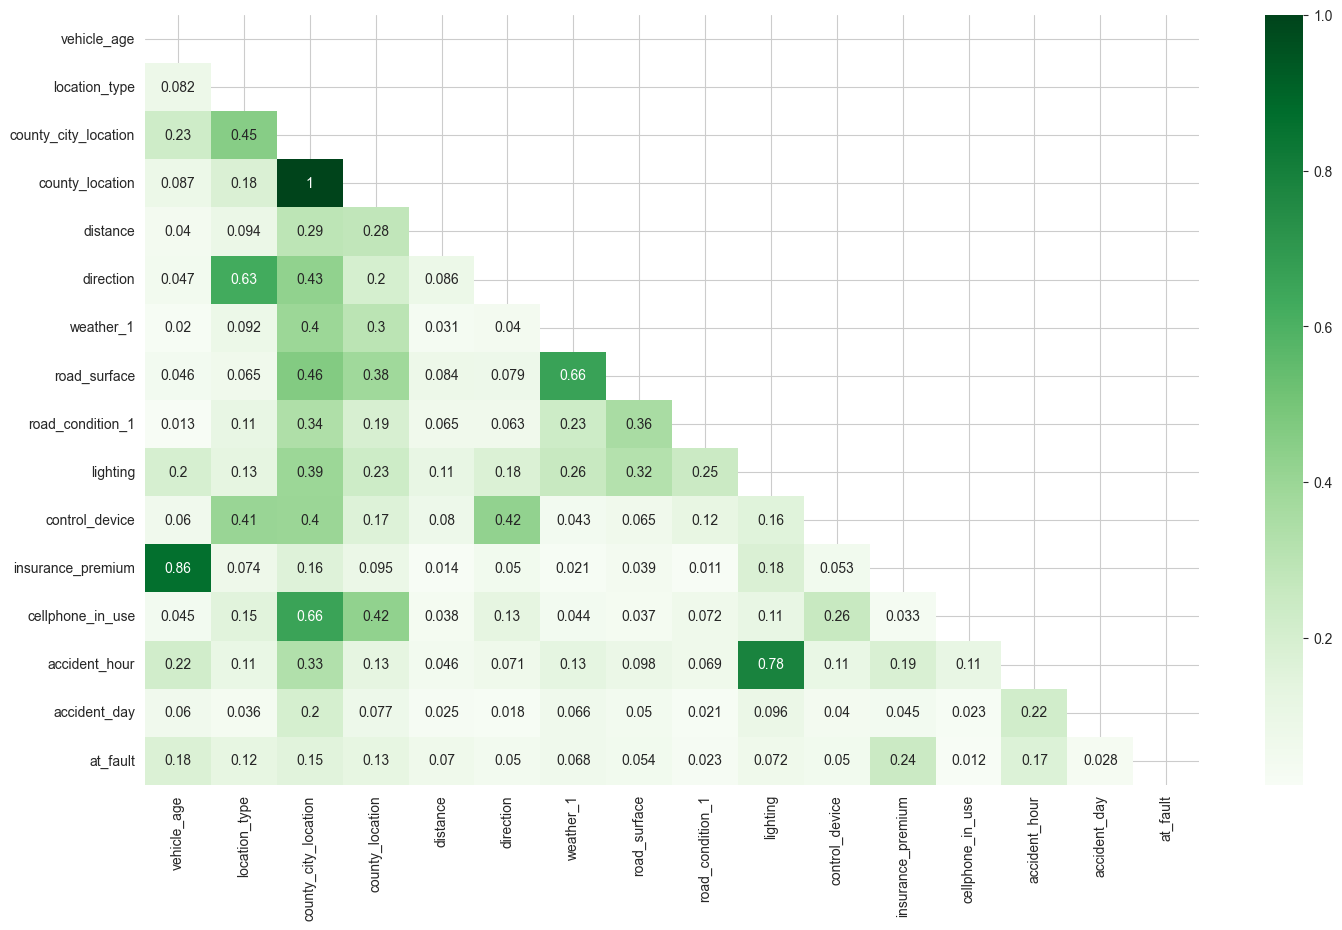

In [188]:
plt.figure(figsize=(17, 10))

# Рисуем матрицу корреляции
sns.heatmap(df.phik_matrix(interval_cols=num_cols),
            annot=True, cmap='Greens',
            mask=np.triu(np.ones_like(
                df.phik_matrix(interval_cols=num_cols),
                dtype=bool)))

plt.show()

### Feature Engineering

Создадим новые признаки:
- `vehicle_age_cat` — заменим возраст на категориальный. До 3-х лет новый автомобиль, от 3-х до 10 — средний, а от 10 лет — старый. Такие цифры были выбраны, основываясь на гистограмме;
- `weather` — разделим погоду на субъективно опасную и безопасную;
- `road_surface` — аналогично пункту выше;
- `road_condition` — аналогично пункту выше;
- `lightning` — разделим данные на день и ночь;
- `control_device` — разделим данные на "есть/нет";
- `is_main_road` — произошло ли ДТП на главной дороге

Столбец `county_city_location` имеет сравнительно неплохую корреляцию с целевым признаком, однако там слишком много уникальных значений, и модели нейронной сети будет очень тяжело обучаться на этом. Выделим самые часты значения, а остальные заменим на `other`.

In [189]:
# Смотрим на самые частые значения
df['county_city_location'].value_counts()

county_city_location
1942    6927
1900    2234
3711    1340
3400    1087
3600    1007
        ... 
0501       1
1924       1
4003       1
0801       1
1305       1
Name: count, Length: 496, dtype: int64

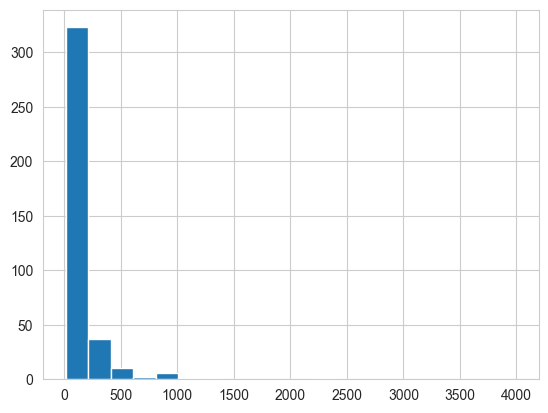

In [190]:
# Выводим гистограмму самых частых значений
plt.hist(df['county_city_location'].value_counts(),
         range=(10, 4000),
         bins=20)

plt.show()

Используем значение 1000 как границу, потому что значения ниже этого встречаются очень часто

In [191]:
# Устанавливаем пороговое значение
threshold = 1000

# Сохраняем значения, соответствующие условию
counts = df['county_city_location'].value_counts()
values = counts[counts > threshold].index.tolist()

# Заменяем все значения, кроме выбранных
df['county_city_location'] = df['county_city_location'].apply(lambda x: x if x in values else 'other')

# Проверяем, все ли корректно привелось
df['county_city_location'].unique()

array(['other', '1900', '3600', '1942', '3400', '3711'], dtype=object)

In [192]:
def categorize_age(value: pd.Series.values) -> pd.Series.values:
    """
    Преобразовывает столбец с возрастом автомобиля в категориальный, используя следующие правила:
     - `new`, если возраст автомобиля меньше 3 лет
     - `mid-aged`, если возраст автомобиля от 3 до 10 лет
     - `old`, если возраст автомобиля больше 10 лет
    :param value: столбец с возрастом автомобиля
    :return: категоризованный столбец с возрастом автомобиля
    """
    if value < 3:
        return 'new'
    if value < 10:
        return 'mid-aged'
    else:
        return 'old'


# Категоризируем возраст автомобиля
df['vehicle_age_cat'] = df['vehicle_age'].apply(categorize_age)

In [193]:
# Категоризируем данные согласно плану
# Погода
df['weather_1'] = df['weather_1'].apply(lambda x: 'not-dangerous' if x in ['clear', 'cloudy'] else 'dangerous')

# Освещение
df['lighting'] = df['lighting'].apply(lambda x: x if x == 'daylight' else 'night')

# Дорожное покрытие
df['road_surface'] = df['road_surface'].apply(lambda x: 'not-dangerous' if x == 'dry' else 'dangerous')

# Дорожное покрытие
df['road_condition_1'] = df['road_condition_1'].apply(lambda x: 'not-dangerous' if x == 'normal' else 'dangerous')

# Средство контроля
df['control_device'] = df['control_device'].apply(lambda x: 'yes' if x == 'functioning' else 'no')

In [194]:
# Создаем новые столбцы.
# Создаем булевый столбец, произошло ли ДТП на главной дороге
df['is_main_road'] = df['distance'].apply(lambda x: 1 if x == 0 else 0)

In [195]:
# Выводим финальный датафрейм
df

,vehicle_age,location_type,county_city_location,county_location,distance,direction,weather_1,road_surface,road_condition_1,lighting,control_device,insurance_premium,cellphone_in_use,accident_hour,accident_day,at_fault,vehicle_age_cat,is_main_road
0,13,unknown,other,san diego,413,east,not-dangerous,not-dangerous,not-dangerous,daylight,no,86,0.0,12.0,4,1,old,0
1,3,unknown,1900,los angeles,1079,north,not-dangerous,not-dangerous,not-dangerous,daylight,no,53,0.0,10.0,0,0,mid-aged,0
2,11,highway,other,los angeles,2534,south,not-dangerous,not-dangerous,not-dangerous,daylight,no,72,0.0,13.0,2,1,old,0
3,6,ramp,other,alameda,0,unknown,not-dangerous,not-dangerous,not-dangerous,night,no,43,unknown,18.0,3,1,mid-aged,1
4,6,unknown,other,nevada,400,south,not-dangerous,not-dangerous,not-dangerous,night,yes,38,0.0,18.0,4,0,mid-aged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56243,4,unknown,other,ventura,50,north,not-dangerous,not-dangerous,not-dangerous,daylight,no,33,0.0,8.0,1,1,mid-aged,0
56244,4,intersection,other,calaveras,0,unknown,not-dangerous,not-dangerous,not-dangerous,night,no,28,0.0,2.0,0,1,mid-aged,1
56245,4,unknown,other,santa clara,73,south,not-dangerous,not-dangerous,not-dangerous,night,no,26,0.0,2.0,0,1,mid-aged,0
56246,5,intersection,other,sacramento,0,unknown,dangerous,not-dangerous,not-dangerous,daylight,no,33,0.0,18.0,3,0,mid-aged,1


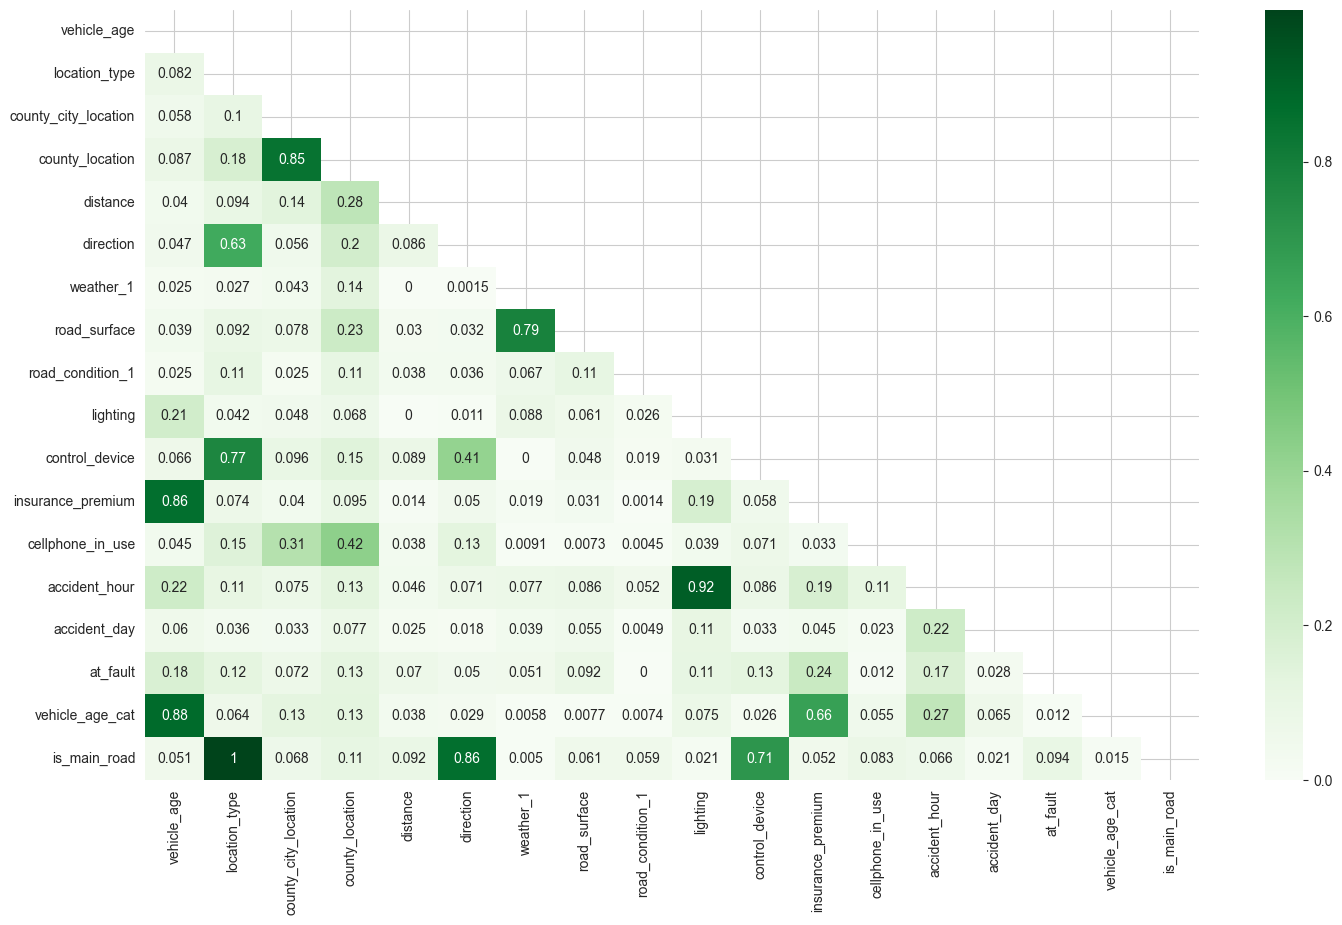

In [196]:
plt.figure(figsize=(17, 10))

# Рисуем матрицу корреляции
sns.heatmap(df.phik_matrix(interval_cols=num_cols),
            annot=True, cmap='Greens',
            mask=np.triu(np.ones_like(
                df.phik_matrix(interval_cols=num_cols),
                dtype=bool)))

plt.show()

Искусственно сгенерированные признаки имеют очень низую корреляцию. Удалим все столбцы, у которых корреляция с таргетом ниже 0.1

In [197]:
# Объявляем список столбцов, которые мы удалим
cols_to_drop = ['county_city_location',
                'distance', 'direction',
                'weather_1', 'road_surface', 'road_condition_1',
                'cellphone_in_use',
                'accident_day',
                'vehicle_age_cat',
                'is_main_road', ]

In [198]:
# Удаляем столбцы с низкой корреляцией
df = df.drop(cols_to_drop, axis=1)

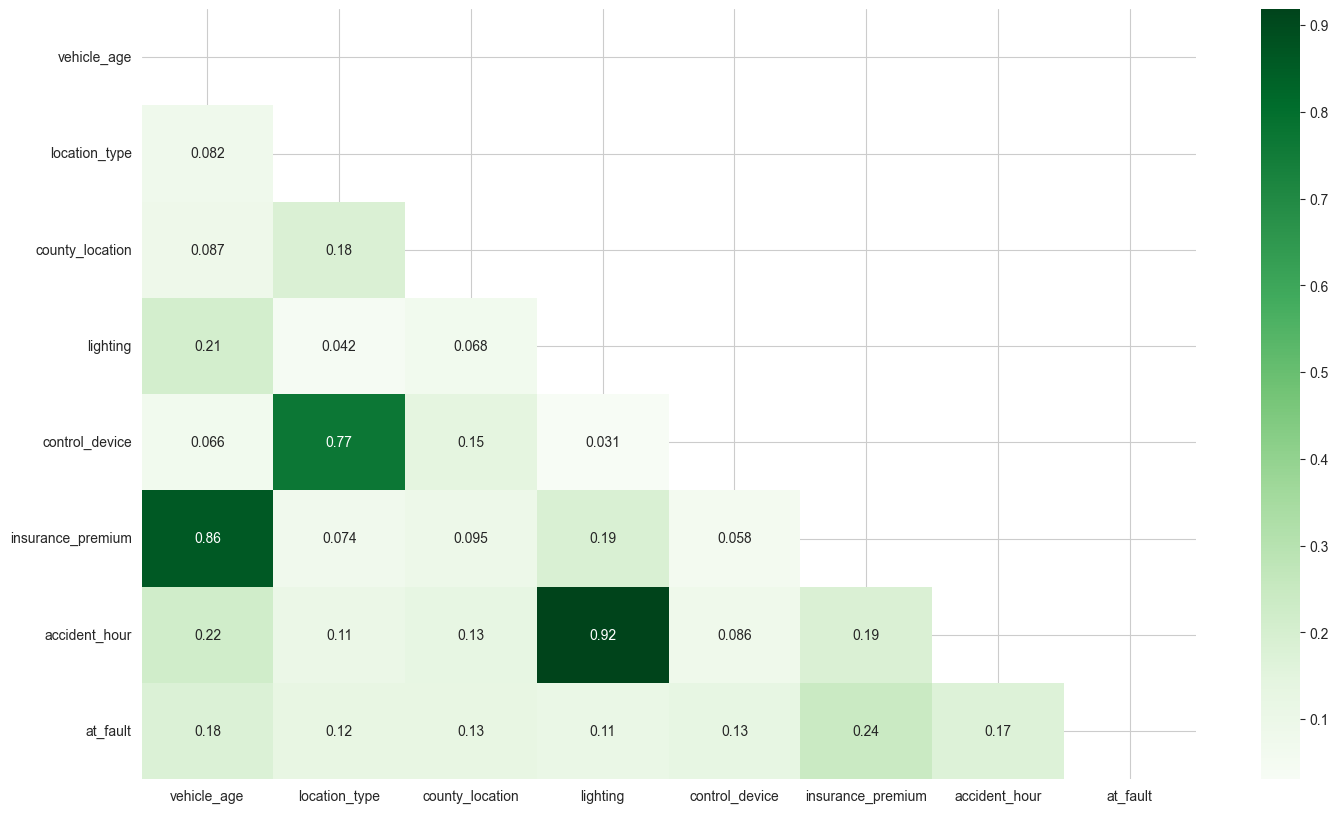

In [199]:
plt.figure(figsize=(17, 10))

# Рисуем матрицу корреляции
sns.heatmap(df.phik_matrix(interval_cols=num_cols),
            annot=True, cmap='Greens',
            mask=np.triu(np.ones_like(
                df.phik_matrix(interval_cols=num_cols),
                dtype=bool)))

plt.show()

In [200]:
# Проверяем, есть ли у нас явные дубликаты
df.duplicated().sum()

5331

In [201]:
# Удаляем явные дубликаты
df = df.drop_duplicates()

# Проверяем, все ли мы удалили
print(df.duplicated().sum())

# Смотрим на новый размер датасета
print(df.shape)

0
(50909, 8)


### Вывод:

Мы провели корреляционный анализ и оставили только столбцы, корреляция с которыми у таргета больше 0.1. Ни один из искусственно созданных признаков не повысили корреляцию с целевым признаком.

После обработки данных и создания новых искусственных признаков у нас появилось немного явных дубликатов. Для облегчения модели, мы удалили их

## Создание моделей для оценки водительского риска

1. Подготовим набор данных на основе первичного предположения заказчика.
2. Проведем первичный отбор факторов, необходимых для модели. Изучим описание факторов. Отберем те, которые могут влиять на вероятность ДТП.
3. Проведем статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внесем корректировки, если они нужны.
    - Категоризируем исходные данные, проведем масштабирование.
    - Подготовим обучающую и тестовую выборки.

### Подготовка данных

In [202]:
# Переопределяем числовые и категориальные столбцы
num_cols = ['vehicle_age', 'insurance_premium']
cat_cols = ['location_type', 'county_location', 'lighting',
            'control_device', 'accident_hour',
            ]

# Проверяем, ну упустили ли мы что-то
print(set(df.columns) - set(cat_cols + num_cols))
print(set(cat_cols + num_cols) - set(df.columns))

{'at_fault'}
set()


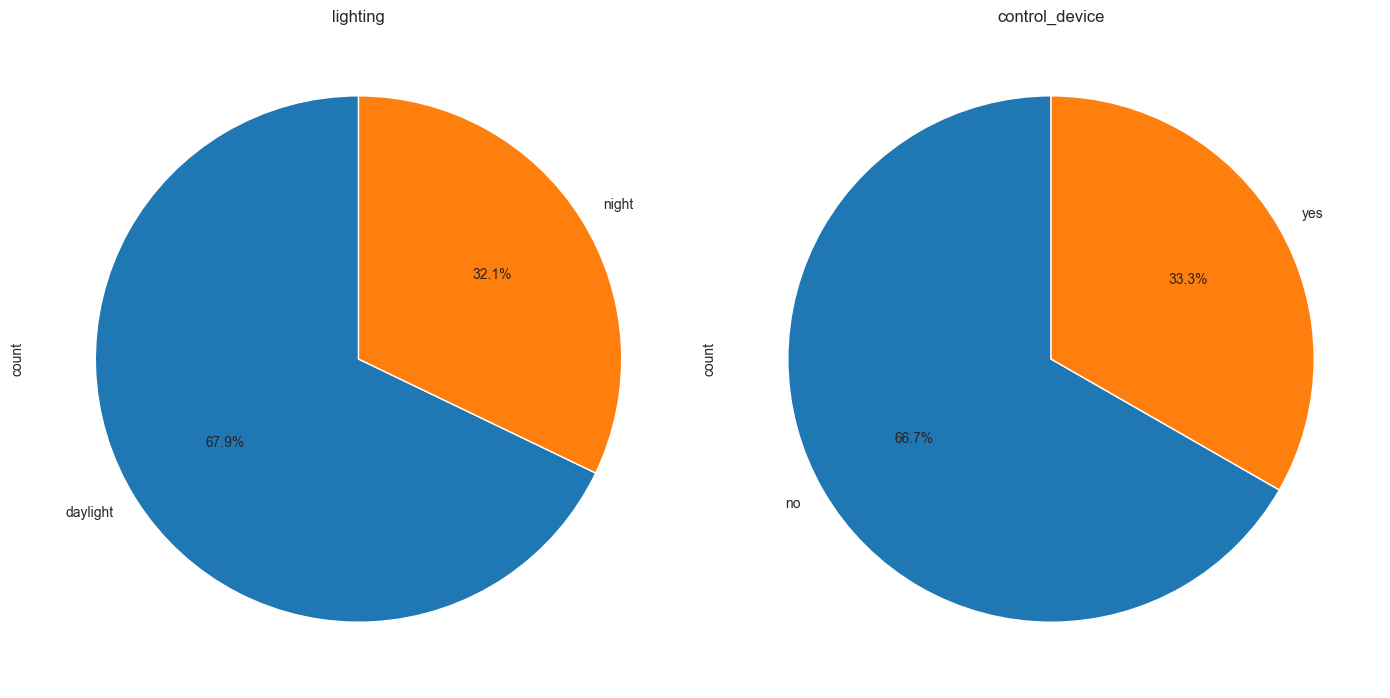

In [203]:
# Создаем фигуру с подграфиками (3 строки, 2 столбца)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 18))

# Проходим по каждому столбцу и соответствующей оси
for col, ax in zip(['lighting', 'control_device'], axes.flat):
    # Строим круговую диаграмму
    df[col].value_counts().plot.pie(
        ax=ax,  # Ось для построения
        title=col,  # Заголовок графика — название столбца
        autopct='%1.1f%%',  # Отображение доли в процентах
        startangle=90,  # Поворот диаграммы для лучшей читаемости
        legend=False  # Отключаем легенду (она не нужна на круговых диаграммах)
    )

# Улучшаем расположение графиков, чтобы они не перекрывались
plt.tight_layout()
# Отображаем график
plt.show()

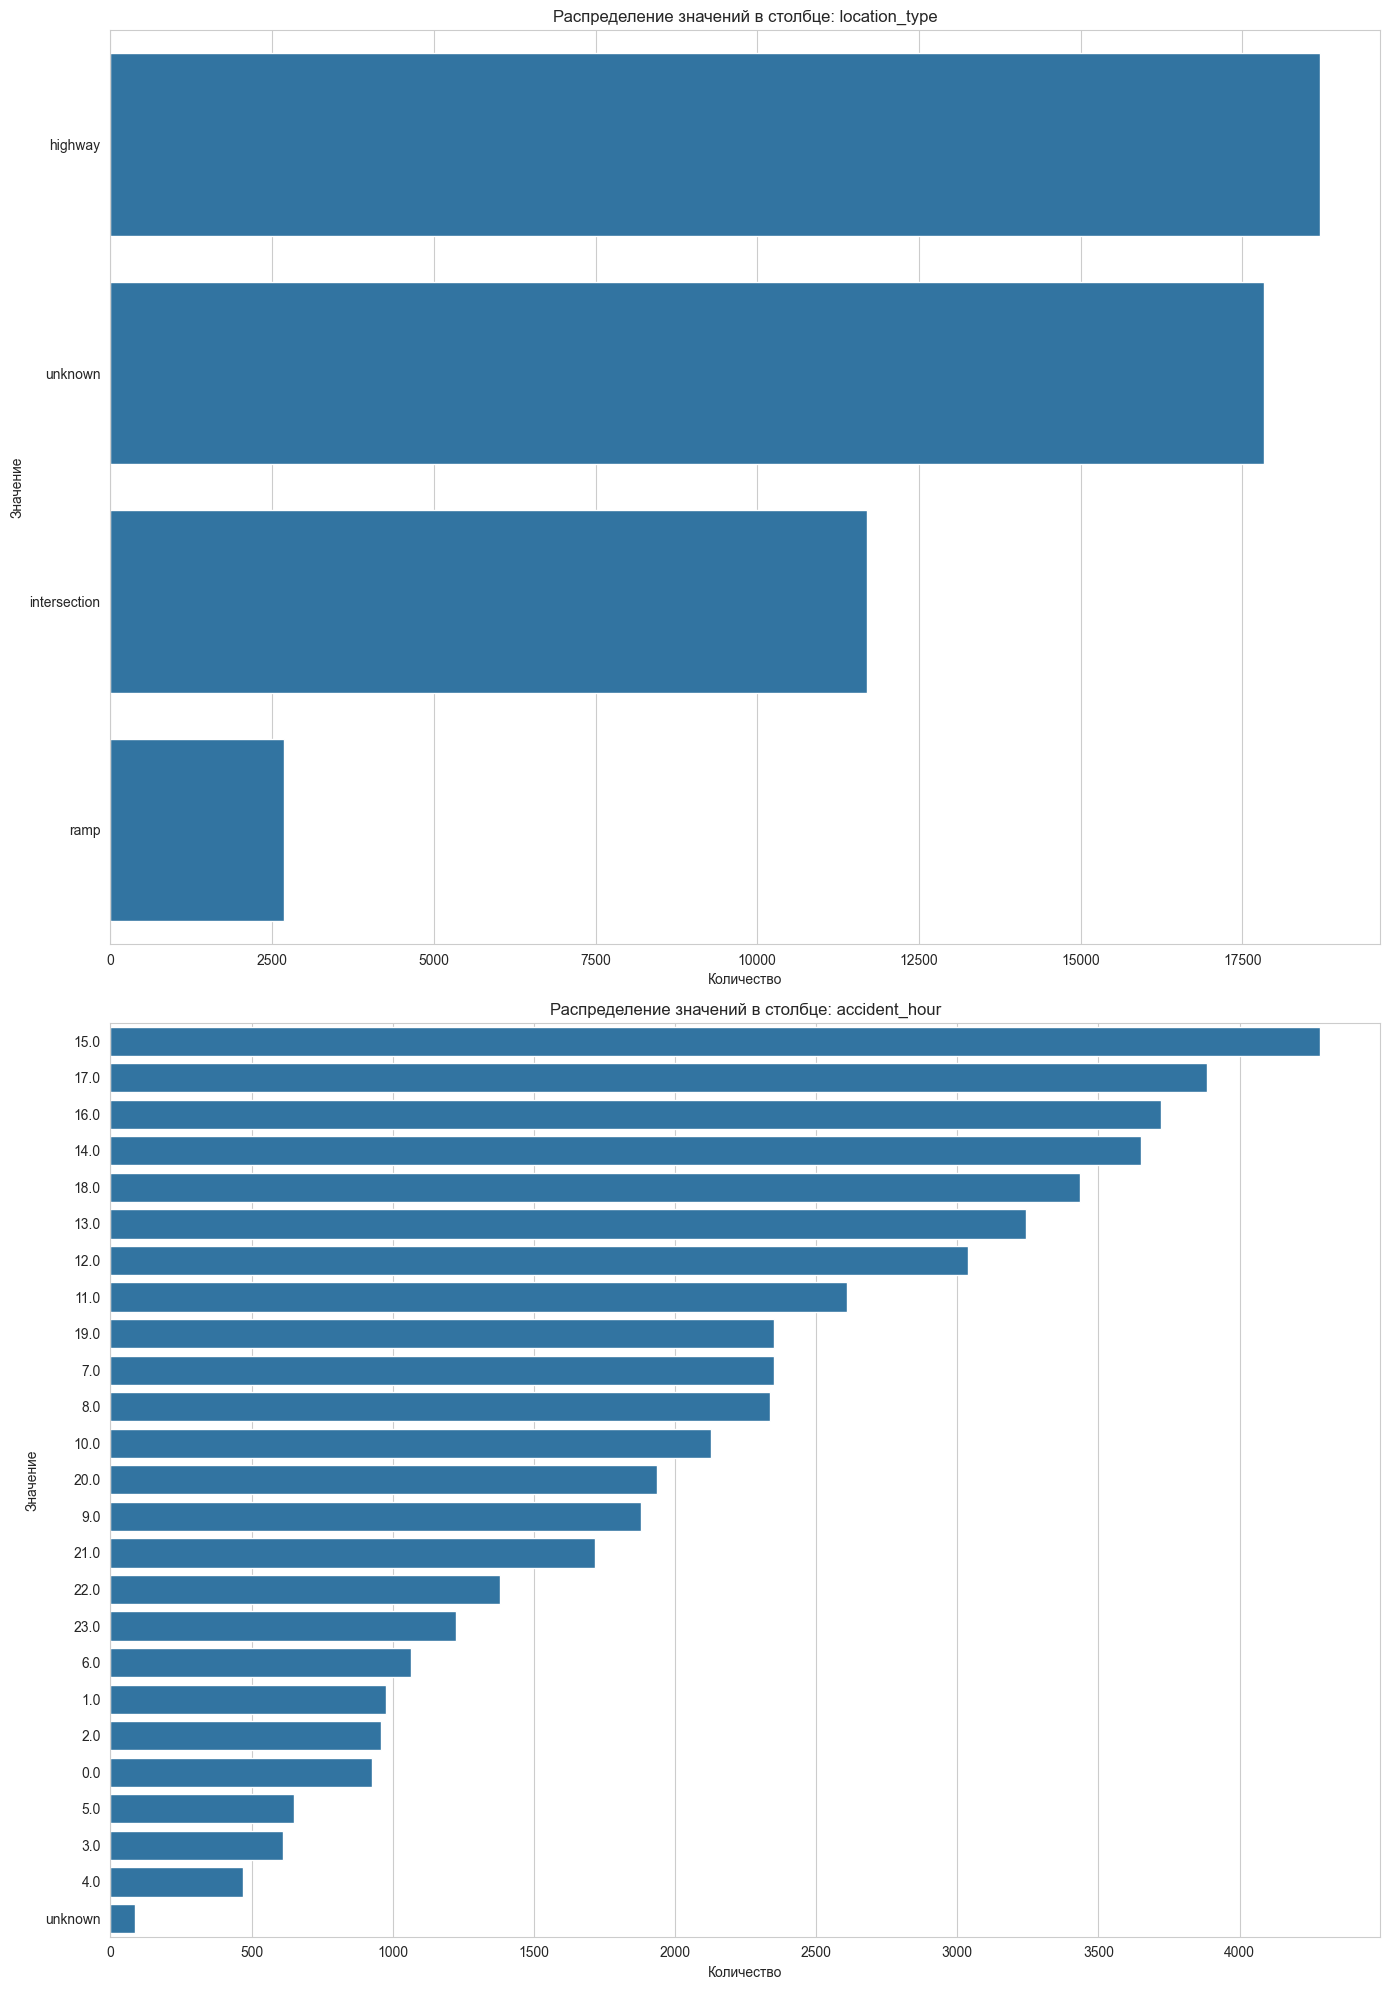

In [204]:
# Создадим фигуру и оси для графика
fig, axes = plt.subplots(2, 1, figsize=(14, 20))

# Для каждого категориального столбца строим горизонтальный barplot
for ax, col in zip(axes, ['location_type', 'accident_hour']):
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, orient='h')
    ax.set_title(f'Распределение значений в столбце: {col}')
    ax.set_xlabel('Количество')
    ax.set_ylabel('Значение')

plt.tight_layout()
plt.show()


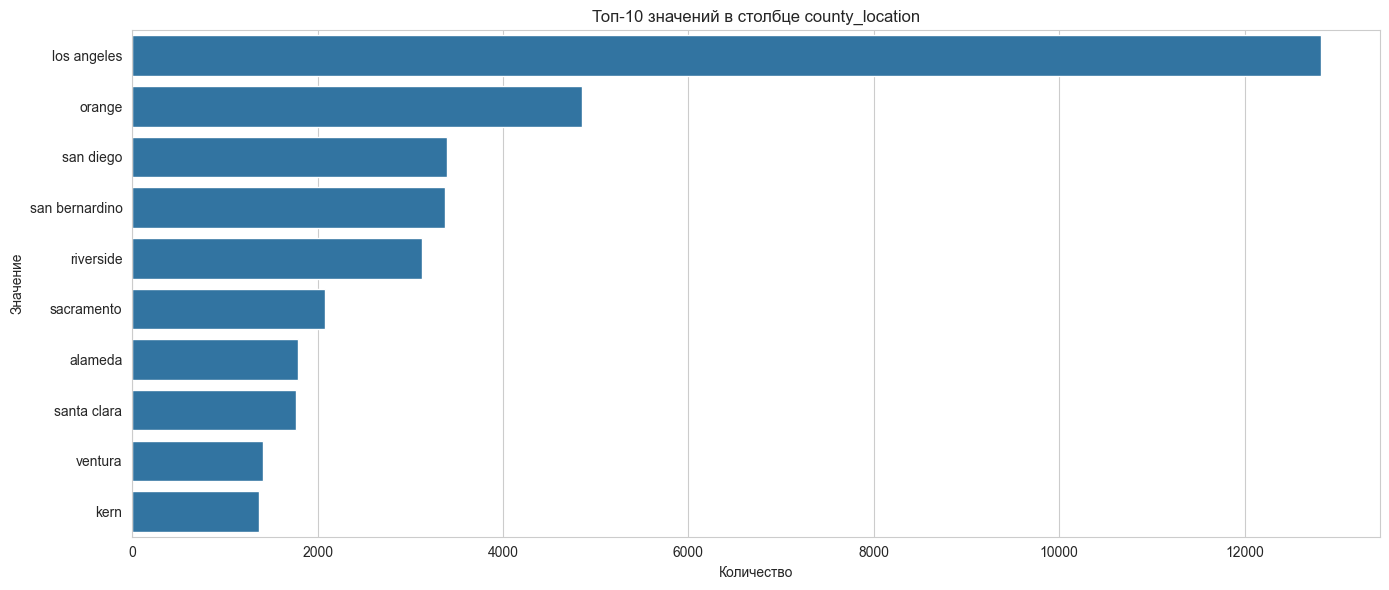

In [205]:
# Построим горизонтальный barplot для первых 10 значений столбца 'county_location'
fig, ax = plt.subplots(figsize=(14, 6))

value_counts = df['county_location'].value_counts()[:10]

# Рисуем горизонтальный barplot
sns.barplot(x=value_counts.values,
            y=value_counts.index,
            ax=ax,
            orient='h')

ax.set_title('Топ-10 значений в столбце county_location')
ax.set_xlabel('Количество')
ax.set_ylabel('Значение')

plt.tight_layout()
plt.show()

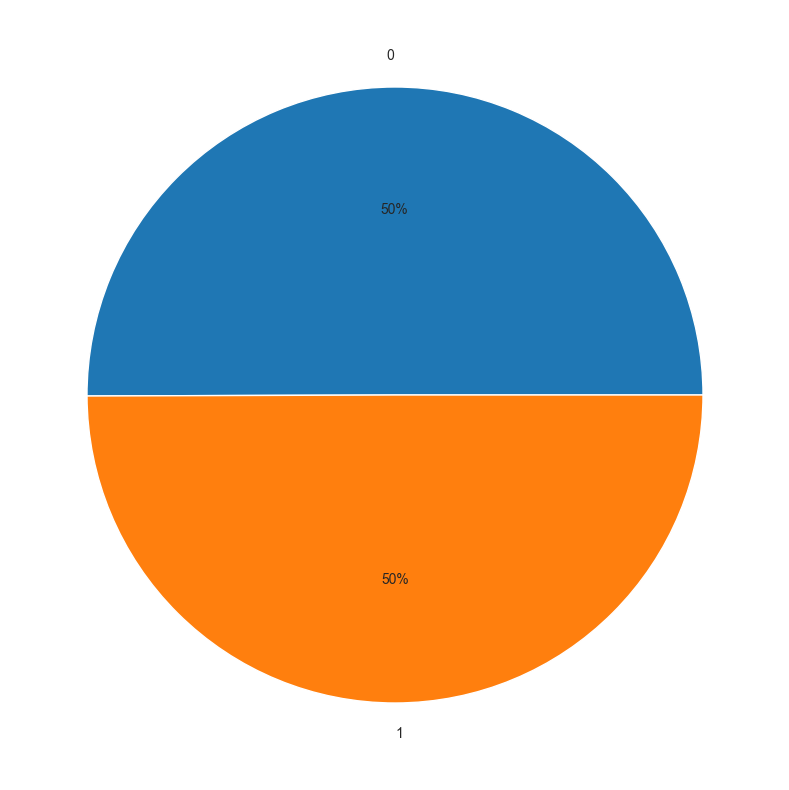

In [206]:
# Посмотрим на то, есть ли у нас дисбаланс классов в целевом признаке
plt.figure(figsize=(17, 10))
plt.pie(x=df['at_fault'].value_counts(),
        labels=df['at_fault'].value_counts().index,
        autopct='%1.0f%%', )

plt.show()

In [207]:
# Приводим категориальные данные к типу 'str'
for col in cat_cols:
    df[col] = df[col].astype(str)

In [208]:
# Разделим данные на тренировочную и тестовые выборки
X = df.drop('at_fault', axis=1).copy()
y = df['at_fault'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE,
                                                    stratify=X[['lighting',
                                                                'control_device']])

In [209]:
# Выводим размерности всех выборок
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print()
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (38181, 7)
y_train: (38181,)

X_test: (12728, 7)
y_test: (12728,)


In [210]:
# Создаем датафрейм с предсказаниями
predictions_df = pd.DataFrame({
    'actual': y_test
})

# Проверяем корректность датафрейма
predictions_df

,actual
54373,1
42284,0
39361,0
14543,1
38342,0
...,...
45067,1
32362,1
18482,0
33556,0


### Создание пайплайна

Создадим пайплайн для кодирования данных и обучения модели.

In [211]:
# Пайплайн для числовых значений
num_pipeline = Pipeline(
    [
        (
            'imputer_before_scaler',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'num',
            StandardScaler()
        ),
    ]
)

# Пайплайн для категориальных значений
cat_pipeline = Pipeline(
    [
        (
            'imputer_before_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'ohe',
            OneHotEncoder(handle_unknown='error', drop='first', sparse_output=False)
        )
    ]
)

In [212]:
# Создаем препроцессор данных
data_preprocessor = ColumnTransformer(
    [
        ('num_preprocessor', num_pipeline, num_cols),
        ('cat_preprocessor', cat_pipeline, cat_cols),
    ],
    remainder='passthrough',
)

In [213]:
# Создаем финальный пайплайн
final_pipeline = Pipeline(
    [
        ('data_preprocessor', data_preprocessor),
        ('model', DummyClassifier(strategy='most_frequent')),
    ]
)

### Обучение моделей

Создадим и обучим несколько моделей:
- Baseline-модели: используем `DummyClassifier`, `LogisticRegression`, `KNeighborsClassifier`, `SVC`
- Boosting-модель: используем только `CatBoost`, так как все бустинг-модели примерно одинаковы по результатам. CatBoost мы будем использовать из-за удобства передачи категориальных данных
- Нейронная сеть: создадим нейронную сеть, используя pytorch

Для подбора гиперпараметров бустинг и нейросетевой моделей будем использовать `Optuna`. Для бейзлайн моделей будем использовать `RandomizedSearchCV`

#### Baseline-модели

In [214]:
# Сетка гиперпараметров для бейзлайн-моделей
baseline_param_grid = [
    # DummyClassifier
    {
        'model': [DummyClassifier(strategy='most_frequent')],
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },

    # LogisticRegression
    {
        'model': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'model__C': range(1, 20),
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },

    # KNeighborsClassifier
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(1, 20),
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
]

In [215]:
baseline_rs = RandomizedSearchCV(
    estimator=final_pipeline,
    param_distributions=baseline_param_grid,
    n_iter=3,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=3
)

In [ ]:
%%time

# Обучаем модель
baseline_rs.fit(X_train, y_train)

In [217]:
%%time

# Получаем лучшую модель после поиска гиперпараметров
best_model = baseline_rs.best_estimator_

# Предсказываем вероятности для класса 1
y_proba = best_model.predict_proba(X_train)[:, 1]

# Вычисляем ROC-AUC вручную
roc_auc = roc_auc_score(y_train, y_proba)

print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.6234
CPU times: user 93.7 ms, sys: 95.5 ms, total: 189 ms
Wall time: 42.9 ms


In [218]:
# Проводим кросс-валидацию на тренировочных данных
cv_scores = cross_val_score(best_model,
                            X_train, y_train,
                            cv=5,
                            scoring='roc_auc')

print(f"Среднее значение ROC-AUC: {cv_scores.mean():.4f}")

Среднее значение ROC-AUC: 0.6180


#### CatBoost

In [219]:
# Сетка гиперпараметров для CatBoost
catboost_param_grid = {
    'iterations': IntDistribution(100, 1000),
    'learning_rate': FloatDistribution(1e-4, 0.3, log=True),
    'depth': IntDistribution(4, 10),
    'l2_leaf_reg': FloatDistribution(1e-3, 10, log=True),
    'border_count': IntDistribution(32, 255),
    'random_strength': FloatDistribution(1e-3, 10, log=True),
    'bagging_temperature': FloatDistribution(0.0, 1.0),
    'use_best_model': CategoricalDistribution([True]),
    'early_stopping_rounds': IntDistribution(10, 50),
    'scale_pos_weight': FloatDistribution(1.0, 5.0),
}

In [220]:
# Поиск гиперпараметров
catboost_optuna = OptunaSearchCV(
    estimator=CatBoostClassifier(
        random_state=RANDOM_STATE,
        cat_features=cat_cols,
        verbose=False,
        thread_count=-1
    ),
    param_distributions=catboost_param_grid,
    n_trials=50,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
%%time

# Обучаем модель
catboost_optuna.fit(X_train, y_train, )

In [222]:
# Выводим метрику на тестовых данных
catboost_optuna.score(X_train, y_train)

0.6638536300412328

In [223]:
%%time

# Проводим кросс-валидацию на тренировочных данных
cv_scores = cross_val_score(catboost_optuna.best_estimator_,
                            X_train, y_train,
                            cv=5,
                            scoring='roc_auc')

print(f"Среднее значение ROC-AUC: {cv_scores.mean():.4f}")

Среднее значение ROC-AUC: 0.6538
CPU times: user 2min 36s, sys: 1min 35s, total: 4min 11s
Wall time: 31.8 s


#### Нейронная сеть

Для начала необходимо создать Архитектуру сети:
- Количество входных слоев: X_train_tensor.shape[1]
- Количество скрытых слоев: 4
- Количество нейронов для скрытых слоев: подберем с помощью поиска гиперпараметров
- Функция активации выходного слоя: `Softmax()`
- Количество выходных слоев: 1
- Dropout: подберем с помощью поиска гиперпараметров

In [224]:
# Оставляем данные как DataFrame
X_train_tensor = data_preprocessor.fit_transform(X_train)
X_test_tensor = data_preprocessor.transform(X_test)

# Преобразуем в float32 и тензоры
X_train_tensor = X_train_tensor.astype(np.float32)
X_test_tensor = X_test_tensor.astype(np.float32)

X_train_tensor = torch.from_numpy(X_train_tensor)
X_test_tensor = torch.from_numpy(X_test_tensor)


# Преобразуем в numpy и float32
y_train_tensor = y_train.values.astype(np.float32)
y_test_tensor = y_test.values.astype(np.float32)

# Создаем тензоры
y_train_tensor = torch.from_numpy(y_train_tensor).view(-1, 1)
y_test_tensor = torch.from_numpy(y_test_tensor).view(-1, 1)

# Перемещаем на устройство
y_train_tensor = y_train_tensor.to(DEFAULT_DEVICE)
y_test_tensor = y_test_tensor.to(DEFAULT_DEVICE)

In [227]:
# Проверяем размерности
print('X_train:', X_train_tensor.shape)
print('y_train:', y_train_tensor.shape)
print()
print('X_test:', X_test_tensor.shape)
print('y_test:', y_test_tensor.shape)

X_train: torch.Size([38181, 88])
y_train: torch.Size([38181, 1])

X_test: torch.Size([12728, 88])
y_test: torch.Size([12728, 1])



##### Pytorch

In [228]:
class Net(nn.Module):
    def __init__(self, n_in_neurons,
                 n_hidden_neurons_1,
                 dropout_1,
                 n_hidden_neurons_2,
                 dropout_2,
                 n_hidden_neurons_3,
                 dropout_3,
                 n_hidden_neurons_4,
                 dropout_4):
        super().__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
        self.act1 = nn.ReLU()
        self.dp1 = nn.Dropout(p=dropout_1)

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=dropout_2)

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.bn3 = nn.BatchNorm1d(n_hidden_neurons_3)
        self.act3 = nn.ReLU()
        self.dp3 = nn.Dropout(p=dropout_3)

        self.fc4 = nn.Linear(n_hidden_neurons_3, n_hidden_neurons_4)
        self.bn4 = nn.BatchNorm1d(n_hidden_neurons_4)
        self.act4 = nn.ReLU()
        self.dp4 = nn.Dropout(p=dropout_4)

        self.fc5 = nn.Linear(n_hidden_neurons_4, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.dp1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.dp2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.act3(x)
        x = self.dp3(x)

        x = self.fc4(x)
        x = self.bn4(x)
        x = self.act4(x)
        x = self.dp4(x)

        x = self.fc5(x)
        return x

In [229]:
def init_weights_xavier(layer):
    if type(layer) == nn.Linear:
        nn.init.xavier_uniform_(layer.weight)


def init_weights_kaiming(layer):
    if type(layer) == nn.Linear:
        nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

In [230]:
def objective(trial):
    global best_state

    # Гиперпараметры для подбора
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    input_size = X_train_tensor.shape[1]

    n_hidden_neurons_1 = trial.suggest_int('n_hidden_neurons_1', 10, 1000)
    dropout_1 = trial.suggest_float('dropout_1', 0.1, 0.9)
    n_hidden_neurons_2 = trial.suggest_int('n_hidden_neurons_2', 10, 1000)
    dropout_2 = trial.suggest_float('dropout_2', 0.1, 0.9)
    n_hidden_neurons_3 = trial.suggest_int('n_hidden_neurons_3', 10, 1000)
    dropout_3 = trial.suggest_float('dropout_3', 0.1, 0.9)
    n_hidden_neurons_4 = trial.suggest_int('n_hidden_neurons_4', 10, 1000)
    dropout_4 = trial.suggest_float('dropout_4', 0.1, 0.9)

    # Создаем модель и перемещаем на устройство
    model = Net(input_size,
                n_hidden_neurons_1, dropout_1,
                n_hidden_neurons_2, dropout_2,
                n_hidden_neurons_3, dropout_3,
                n_hidden_neurons_4, dropout_4).to(DEFAULT_DEVICE)

    # Инициализируем веса
    model.apply(init_weights_xavier)

    # Создаем DataLoader
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor.to(DEFAULT_DEVICE),
                                                   y_train_tensor.to(DEFAULT_DEVICE))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Оптимизатор и loss
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()  # Комбинированный loss для бинарной классификации

    # Подготовка валидационных данных
    X_val = X_test_tensor.to(DEFAULT_DEVICE)
    y_val = y_test_tensor.view(-1, 1).to(DEFAULT_DEVICE)

    # Ранняя остановка
    patience = 5
    best_loss = float('inf')
    no_improvement = 0

    max_epochs = 500
    best_epoch = 0  # Счетчик эпох до остановки

    # Обучение модели
    for epoch in range(max_epochs):  # Максимальное количество эпох
        # Обучение
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            # Данные уже на устройстве благодаря TensorDataset
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss += loss.item() * X_batch.size(0)

        # Валидация
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val).item()

            # Получаем вероятности
            val_probs = torch.sigmoid(val_outputs)
            val_auc = roc_auc_score(y_val.cpu().numpy(), val_probs.cpu().numpy())

        # Ранняя остановка
        if val_loss < best_loss:
            best_loss = val_loss
            best_epoch = epoch
            trial.set_user_attr("best_state", model.state_dict())
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement >= patience:
                break

        # Логирование метрик
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        # Сохраняем количество эпох в trial
        trial.set_user_attr("best_epoch", best_epoch + 1)

        if epoch % 10 == 0:
            print(f'Epoc {epoch} | loss: {val_loss:.4f} | roc_auc: {val_auc:.4f}')

    return best_loss

In [ ]:
%%time
# Запускаем подбор гиперпараметров
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=7)

In [232]:
# Находим лучший trial
best_trial = study.best_trial

# Извлекаем гиперпараметры и state_dict
best_params = best_trial.params
best_state = best_trial.user_attrs["best_state"]

# Создаем модель с теми же гиперпараметрами
best_model = Net(
    n_in_neurons=X_train_tensor.shape[1],
    n_hidden_neurons_1=best_params["n_hidden_neurons_1"],
    dropout_1=best_params["dropout_1"],
    n_hidden_neurons_2=best_params["n_hidden_neurons_2"],
    dropout_2=best_params["dropout_2"],
    n_hidden_neurons_3=best_params["n_hidden_neurons_3"],
    dropout_3=best_params["dropout_3"],
    n_hidden_neurons_4=best_params["n_hidden_neurons_4"],
    dropout_4=best_params["dropout_4"],
).to(DEFAULT_DEVICE)

# Загружаем веса
best_model.load_state_dict(best_state)

<All keys matched successfully>

In [233]:
# Переводим тестовые данные на устройство
X_train_device = X_train_tensor.to(DEFAULT_DEVICE)

# Делаем предсказание
best_model.eval()
with torch.no_grad():
    outputs = best_model(X_train_device)

# # Сохраняем предсказания
nn_proba = torch.sigmoid(outputs).cpu().numpy()

# Смотрим на метрику
roc_auc_score(y_train, nn_proba)

0.6739230510843874

In [234]:
X_train_tensor.shape

torch.Size([38181, 88])

In [235]:
# Размеры выборки
sample_sizes = [1000, 2000, 3000, 5000, 8000]
results = []

# Переводим модель в режим оценки
best_model.eval()

for size in sample_sizes:
    # Берем случайную подвыборку из тренировочного датасета
    indices = np.random.choice(len(X_train_tensor), size=size, replace=False)
    X_sample = X_train_tensor[indices].to(DEFAULT_DEVICE)  # Перемещаем на устройство
    y_sample = y_train_tensor[indices].cpu().numpy()       # Сразу копируем на CPU и в numpy

    # Делаем предсказания
    with torch.no_grad():
        outputs = best_model(X_sample)
        probs = torch.sigmoid(outputs).cpu().numpy()  # Уже на CPU

    # Вычисляем метрику
    auc = roc_auc_score(y_sample, probs)  # Оба массива на CPU
    results.append(auc)

# Выводим результаты
print(results)
print(f'ROC-AUC: {sum(results) / len(sample_sizes)}')

[0.6805184879901087, 0.6716417462679403, 0.6906999302932662, 0.6748519061961356, 0.679718710968711]
ROC-AUC: 0.6794861563432322


##### TensorFlow

In [236]:
# Предполагаем, что X_train, X_test, y_train, y_test — это DataFrame
X_train_np = data_preprocessor.fit_transform(X_train).astype(np.float32)
X_test_np = data_preprocessor.transform(X_test).astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

In [237]:
def build_model(input_size, n_hidden_neurons_1, dropout_1, n_hidden_neurons_2, dropout_2,
                n_hidden_neurons_3, dropout_3, n_hidden_neurons_4, dropout_4):
    model = Sequential()
    initializer = GlorotUniform()

    model.add(Dense(n_hidden_neurons_1, input_shape=(input_size,), kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(dropout_1))

    model.add(Dense(n_hidden_neurons_2, kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(dropout_2))

    model.add(Dense(n_hidden_neurons_3, kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(dropout_3))

    model.add(Dense(n_hidden_neurons_4, kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(dropout_4))

    model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))

    return model

In [238]:
def objective(trial):
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    n_hidden_neurons_1 = trial.suggest_int('n_hidden_neurons_1', 10, 1000)
    dropout_1 = trial.suggest_float('dropout_1', 0.1, 0.9)
    n_hidden_neurons_2 = trial.suggest_int('n_hidden_neurons_2', 10, 1000)
    dropout_2 = trial.suggest_float('dropout_2', 0.1, 0.9)
    n_hidden_neurons_3 = trial.suggest_int('n_hidden_neurons_3', 10, 1000)
    dropout_3 = trial.suggest_float('dropout_3', 0.1, 0.9)
    n_hidden_neurons_4 = trial.suggest_int('n_hidden_neurons_4', 10, 1000)
    dropout_4 = trial.suggest_float('dropout_4', 0.1, 0.9)

    model = build_model(X_train_np.shape[1], n_hidden_neurons_1, dropout_1, n_hidden_neurons_2, dropout_2,
                        n_hidden_neurons_3, dropout_3, n_hidden_neurons_4, dropout_4)

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train_np, y_train_np, validation_data=(X_test_np, y_test_np), epochs=500,
                        batch_size=batch_size, callbacks=[early_stopping], verbose=0)

    best_val_loss = min(history.history['val_loss'])

    model_path = f'model_trial_{trial.number}.h5'
    model.save(model_path)
    trial.set_user_attr('model_path', model_path)

    return best_val_loss

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=7)

best_trial = study.best_trial
best_model_path = best_trial.user_attrs['model_path']
best_model = tf.keras.models.load_model(best_model_path)

In [240]:
probs = best_model.predict(X_train_np).flatten()
roc_auc = roc_auc_score(y_train_np, probs)
print(f'ROC-AUC on entire training data: {roc_auc}')

1194/1194 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step
ROC-AUC on entire training data: 0.6627251922211548


In [241]:
sample_sizes = [1000, 2000, 3000, 5000, 8000]
results = []

for size in sample_sizes:
    indices = np.random.choice(len(X_train_np), size=size, replace=False)
    X_sample = X_train_np[indices]
    y_sample = y_train_np[indices]

    probs = best_model.predict(X_sample).flatten()
    auc = roc_auc_score(y_sample, probs)
    results.append(auc)

print(results)
print(f'Average ROC-AUC on sample sizes: {sum(results) / len(sample_sizes)}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
[0.6882594334901413, 0.6543983490115186, 0.6772220688588296, 0.6604112653546869, 0.6656136017458112]
Average ROC-AUC on sample sizes: 0.6691809436921975


### Сравнение моделей

В качестве метриики используем `ROC-AUC`, так как учитывает работу модели в целом, вне зависимости от выбранного порога. На кросс-валидации лучшей моделью ялвяется CatBoost. Для этой модели метрика составляет 0.658. Свсем чуть-чуть ей уступает Нейронная сеть, показав метрику в 0.649. Baseline-модель имеет метрику 0.613. Стоит отметить, что абсолютным лидером по времени обучения является Catboost, обучаясь за 1 минуту. Далее идет baseline-модель с временем обучения 5 минут, после чего нейронная сеть с временем обучения в 40 минут.


| Модель     | Время работы | ROC-AUC |
|------------|--------------|---------|
| Baseline   | 2 секунды    | 0.62    |
| СatBoost   | 30 секунд    | 0.66    |
| Pytorch    | 4.2 минут    | 0.673   |
| TensorFlow | 3.7 минуты   | 0.662   |



In [242]:
catboost_proba = catboost_optuna.predict_proba(X_test)[:, 1]

print(f'ROC-AUC: {roc_auc_score(y_test, catboost_proba):.2f}')

ROC-AUC: 0.65


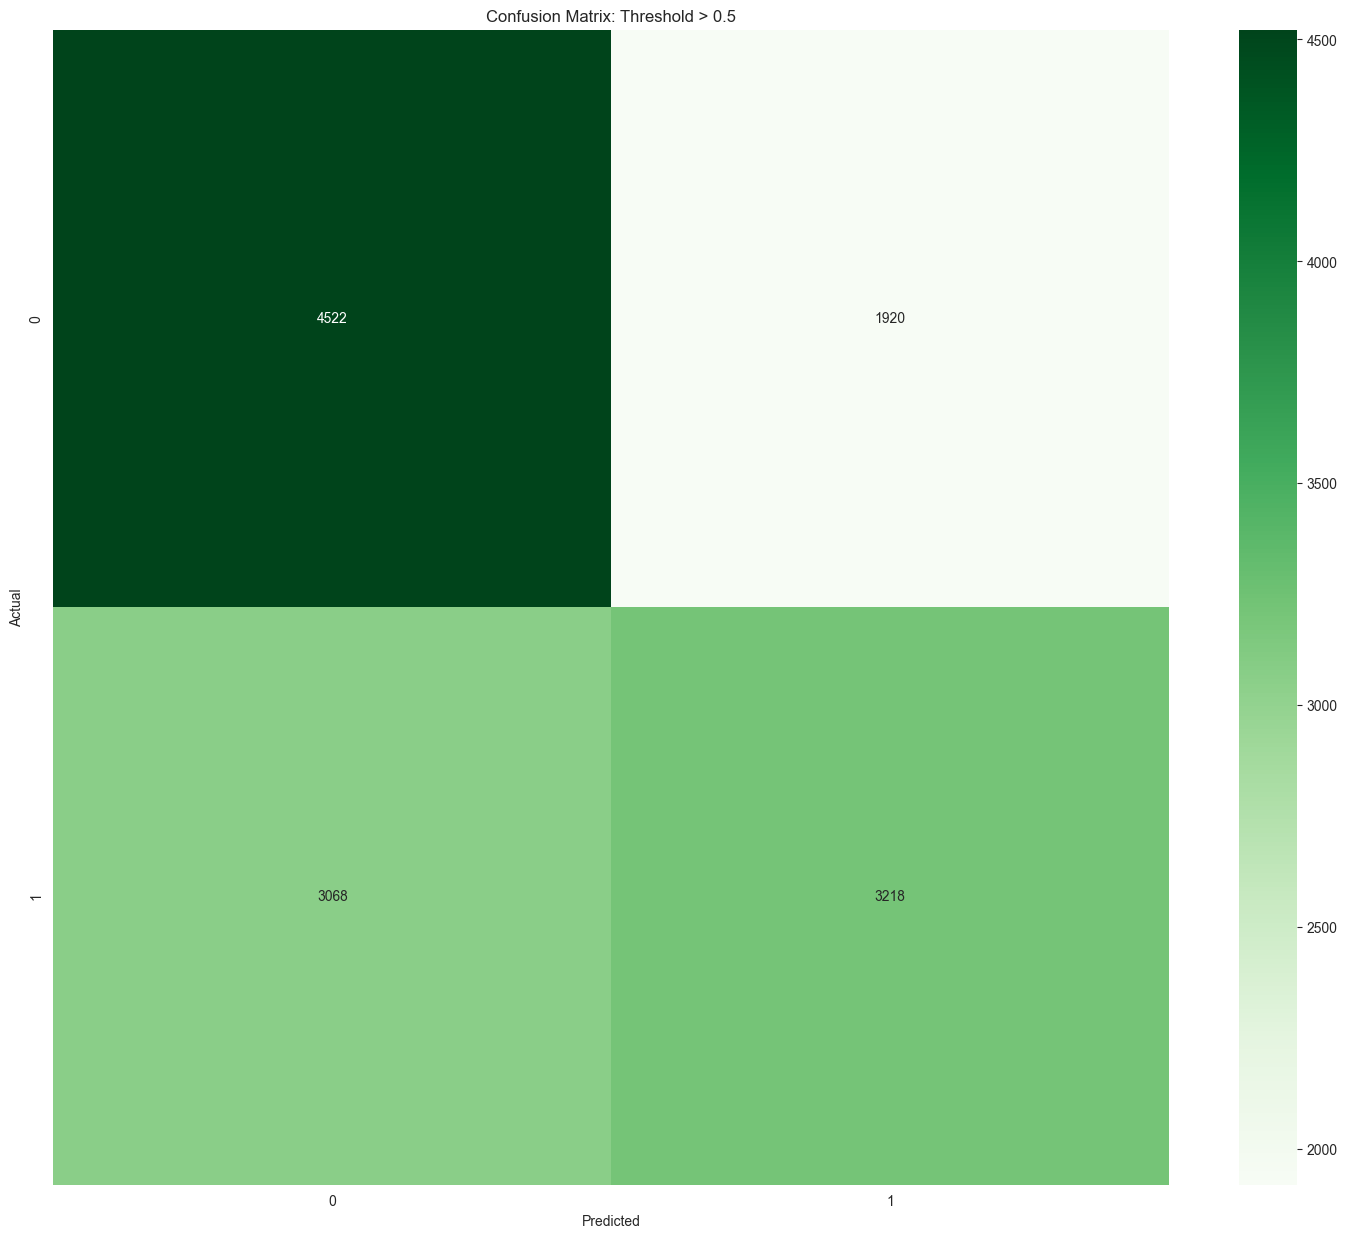

<Figure size 600x500 with 0 Axes>

In [243]:
# Посмотрим на матрицу без выбора порога
fig, ax = plt.subplots(figsize=(18, 15))

# Строим confusion matrix для нейронной сети
cm = confusion_matrix(y_test, catboost_proba > 0.5)

# Визуализируем матрицу с помощью seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_title('Confusion Matrix: Threshold > 0.5')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

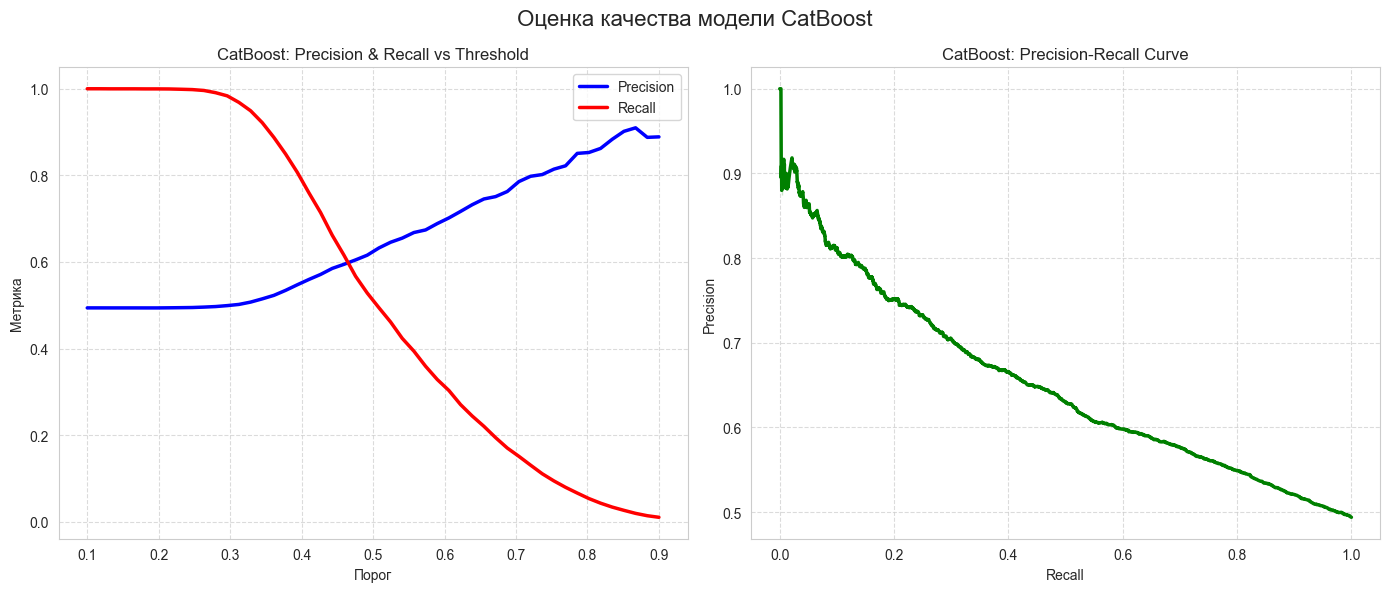

In [244]:
# Определяем диапазон порогов
thresholds = np.linspace(0.1, 0.9, 50)

# Хранение результатов
pr_results = []

# Вычисляем метрики для каждого порога
for thresh in thresholds:
    preds = (catboost_proba >= thresh).astype(int)
    try:
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
    except ValueError:
        precision = 0
        recall = 0
    pr_results.append({
        'threshold': thresh,
        'precision': precision,
        'recall': recall
    })

# Создаем DataFrame
pr_df = pd.DataFrame(pr_results)

# Создаем фигуру с 2 графиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout(pad=4.0)

# График Precision и Recall в зависимости от порога
ax = axes[0]
sns.lineplot(
    data=pr_df,
    x='threshold',
    y='precision',
    label='Precision',
    ax=ax,
    color='blue',
    linewidth=2.5
)
sns.lineplot(
    data=pr_df,
    x='threshold',
    y='recall',
    label='Recall',
    ax=ax,
    color='red',
    linewidth=2.5
)
ax.set_title('CatBoost: Precision & Recall vs Threshold')
ax.set_xlabel('Порог')
ax.set_ylabel('Метрика')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# График Precision-Recall Curve
ax = axes[1]
precision, recall, _ = precision_recall_curve(y_test, catboost_proba)
sns.lineplot(
    x=recall,
    y=precision,
    ax=ax,
    color='green',
    linewidth=2.5
)
ax.set_title('CatBoost: Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Оценка качества модели CatBoost', fontsize=16)
plt.tight_layout()
plt.show()

Лучшим порогом, учитывающим обе метрики `precision` `recall` является ~0.48. Таким образом предсказания модели будут сбалансированы между наибольшой прибылью и безопасностью. Для повышения безопасности порог стоит понизить, для повышения прибили его стоит повысить

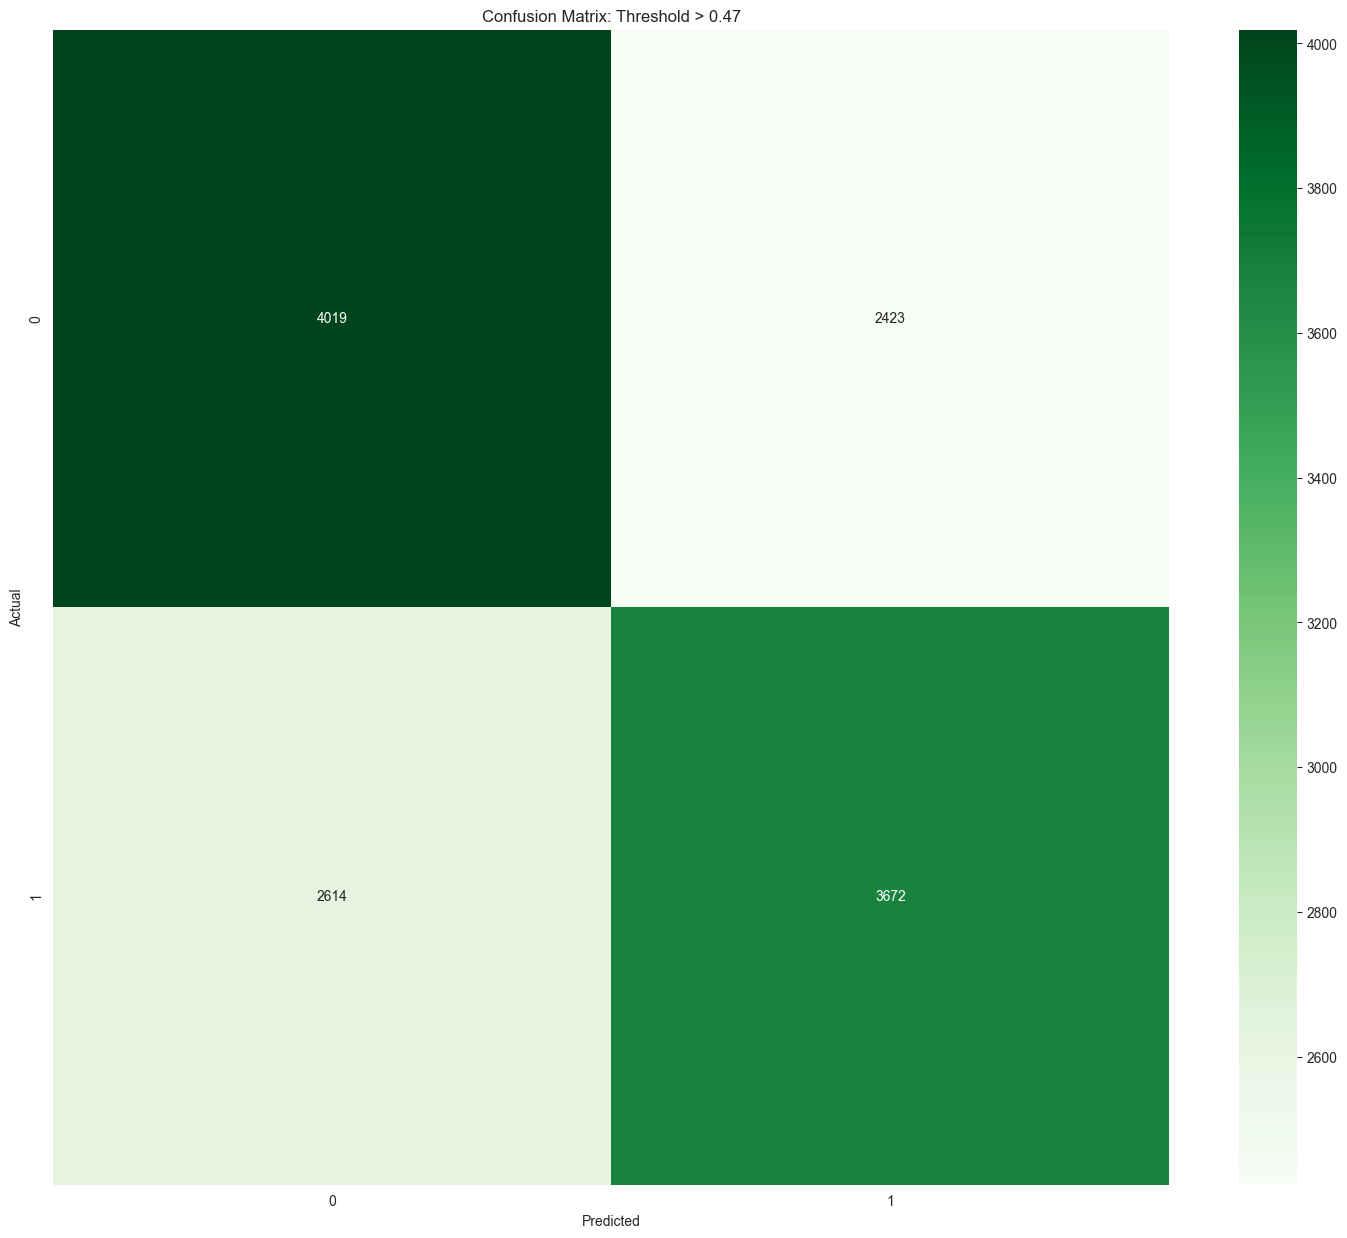

<Figure size 600x500 with 0 Axes>

In [245]:
fig, ax = plt.subplots(figsize=(18, 15))

# Строим confusion matrix для нейронной сети
cm = confusion_matrix(y_test, catboost_proba > 0.47)

# Визуализируем матрицу с помощью seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_title('Confusion Matrix: Threshold > 0.47')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

### Вывод:

Среди всех моделей лучше всего себя показал CatBoost.
 
При использовании стандартного порога в 0.5 одель демонстрирует высокое количество ложных отрицательных срабатываний (False Negative = 3100) , что указывает на риск пропуска виновных водителей. Однако ложные положительные срабатывания (False Positive = 1800) находятся на приемлемом уровне, что позволяет сохранять часть клиентов. Модель недостаточно строга — 3100 виновных водителей не были идентифицированы. Это критично для задачи, где важно минимизировать риски ДТП.

При настройке прога вручную (0.47) показатели чуть улучшаются. Как и было сказано выше, модельсоблюдает баланс между ложноположительными и ложноотрицательными ответами


## Анализ важности факторов ДТП

Так как CatBoost показал себя лучше всего, то используем его для того, чтобы вывести важность признаков

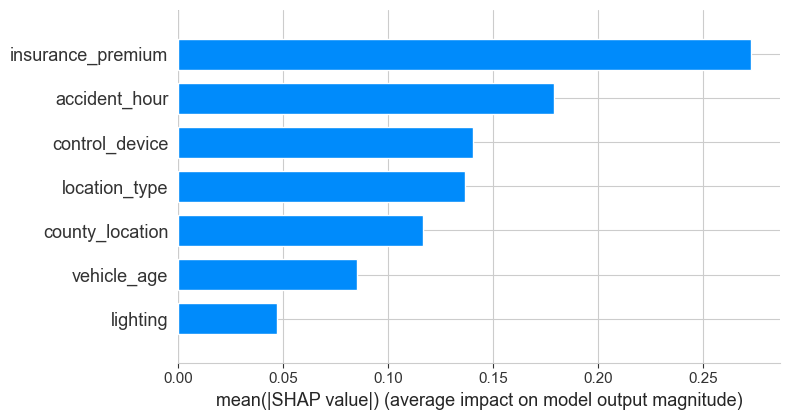

In [247]:
# Создаем объясняющий объект для модели CatBoost
explainer = shap.TreeExplainer(catboost_optuna.best_estimator_)

# Рассчитываем значения SHAP для тестовой выборки
shap_values = explainer.shap_values(X_test)

# Визуализация Summary Plot (общая важность признаков)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

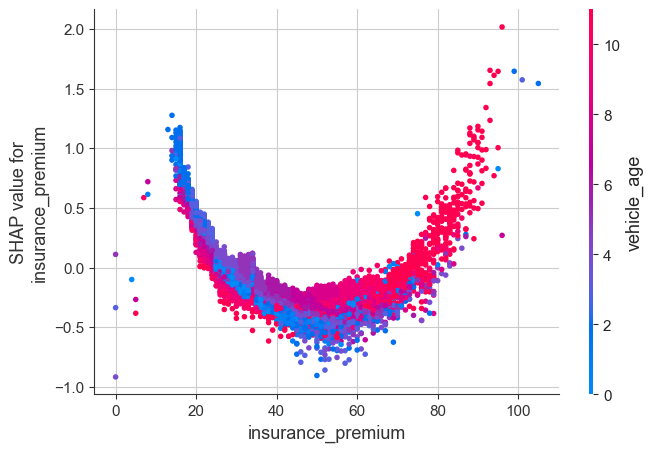

In [248]:
# Визуализация детальных зависимостей
shap.dependence_plot('insurance_premium', shap_values, X_test)

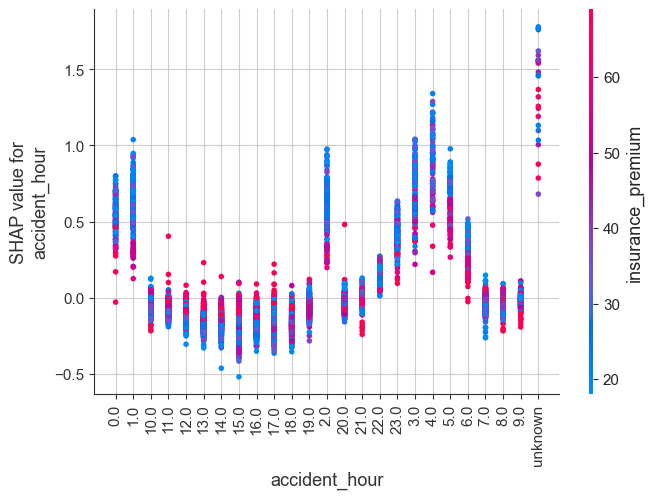

In [249]:
# Визуализация детальных зависимостей
shap.dependence_plot('accident_hour', shap_values, X_test)

,count,sum,local_percent,total_percent
accident_hour,,,,
0.0,926,598,64.6,2.4
1.0,975,686,70.4,2.7
10.0,2128,1009,47.4,4.0
11.0,2608,1256,48.2,4.9
12.0,3038,1456,47.9,5.7
13.0,3242,1510,46.6,5.9
14.0,3650,1741,47.7,6.8
15.0,4283,1937,45.2,7.6
16.0,3723,1752,47.1,6.9


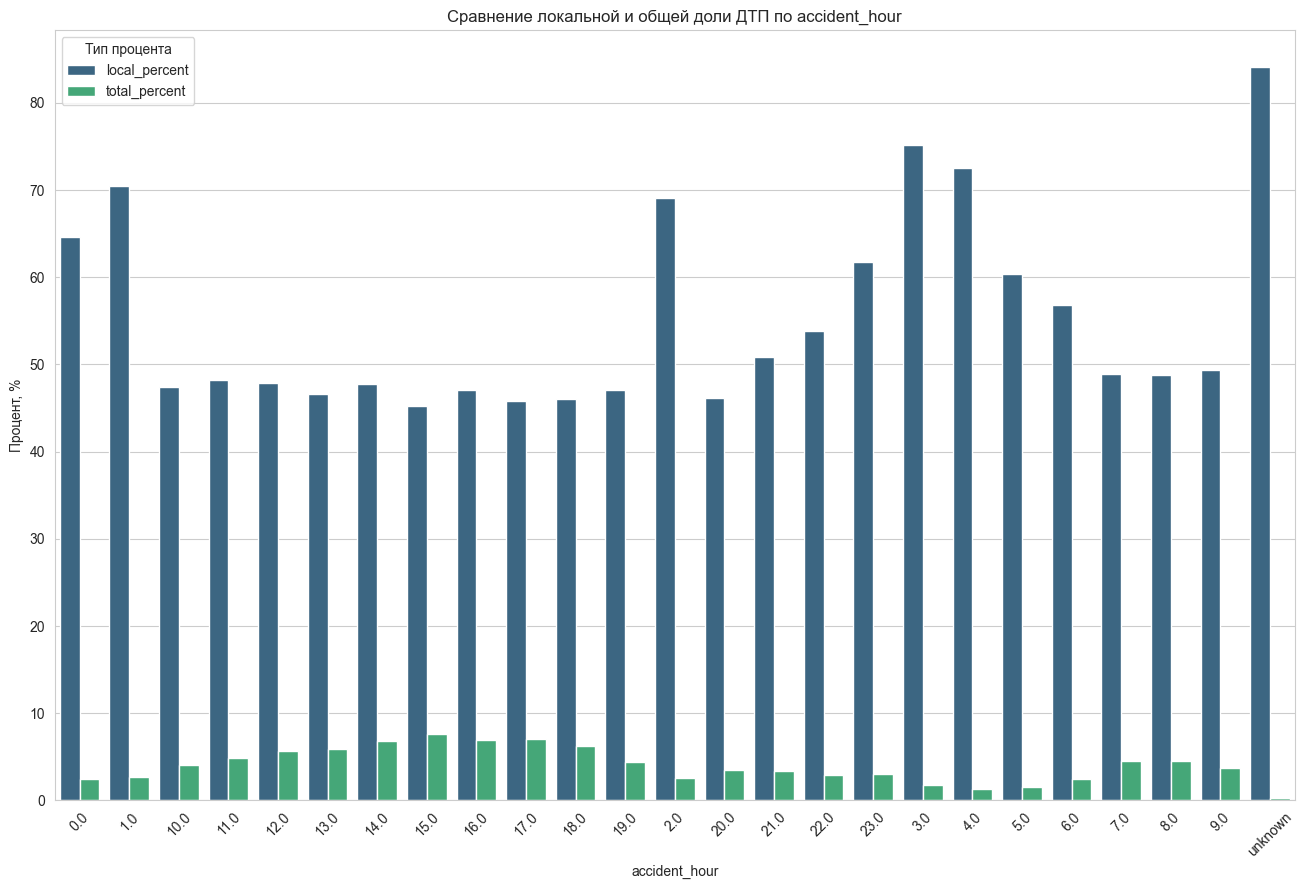

In [250]:
draw_pivot('accident_hour')

### Вывод:

Мы видим, что ключевыми факторами, влияющими на предсказание модели, являются **страховой взнос** (`insurance_premium`), **время аварии** (`accident_hour`) и **тип локации** (`location_type`).
- **Страховой взнос** имеет наибольшее влияние: его рост коррелирует с увеличением вероятности виновности водителя (положительные SHAP значения при высоких значениях).
- **Время аварии**. Глобально, больше количество аварий происходит в дневное время, однако это обуславливается тем, что в дневное время и больше поток машин. Если же смотреть на локальный процент ДТП, то больше аварий происходит в ночное/раннее вермя
- **Тип локации** (`highway`, `intersection`, `ramp`) модифицирует влияние времени: на шоссе аварии чаще происходят днём, а на перекрестках — ночью.

Мы решили, что для улучшения модели стоит учитывать дополнительные данные, такие как **история нарушений водителя** или **погодные условия**, которые могут объяснить аномалии в SHAP-значениях. Например, высокий страховой взнос может быть связан с предыдущими ДТП, а ночная авария на перекрестье — с плохим освещением.

Предложения для повышения метрики:
- Для столбца `insurance_premium` можно отказывать в аренде пользователям с высоким страховым взносом.
- Так как для признака `accident_hour` мы выявили, что большинство ДТП происходит в ночные/очень ранние часы, то потенциально причина может заключаться в том, что водитель засыпает. Можно оборудовать автомобиль камерой, которая отслеживала положение глаз водителя и воспроизовдила громкий звук, если веки были бы закрыты больше пары секунд.
- Также можно ввести новые признаки, которые потенциально могут увеличить повысить итоговую метрику и способстовать более точному прдесказанию таргета:
    - `pcf_vaolation_category` — можно попробовать оборудовать автомобили внешними камерами и компьютерным зрением, которое будет считывать стиль вождения (неуверенный, агрессивный, спокойный, итд), создавая "профиль" водителя. Или же можно создать реестр правонарушениий пользователей, после чего запрашивать к ним доступ.
    - `is_vehicle_violation` — это признак, который показывает, стало ли причиной ДТП нарушение правил дорожного движения, или же какой-то внешний фактор. Для проверки этого признака перед арендой автомобиля, можно случайным образом просить пользователя отвечать на пару вопросов из ПДД при попытке арендовать автомобиль.
    - `party_sobriety` — можно оборудовать автомобиль алкотестером и камерой для проверки того, что непосредственно водитель проходит тестирование.

## Общий вывод:

**Общий краткий вывод**  
Лучше всего себя показала бустинг модель `CatBoost`, основываясь на финальной метрике и времени рабоыт. Модель уже показывала себя неплохо (ROC-AUC = 0.6), однако для введения ее в эксплуатацю стоит добавить новые признаки, которые потенциально могут повысить точность модели. Невозможно точно предсказать ДТП, ибо существуют внешние факторы, никак не зависящие от водителя, однако проект показал, что в большинстве своем именно человек является причиной ДТП.

---

**Расширенный вывод**  
1. **Предобработка данных**:  
   - Мы объединили таблицы `collisions`, `parties` и `vehicles` по ключам `case_id` и `party_number`.  
   - Удалили явные дубликаты (5331 запись) и заполнили пропуски медианными значениями для числовых столбцов и `unknown` для категориальных.  
   - Исключили неинформативные признаки, такие как `intersection` (неявный дубликат `location_type`), и привели данные к корректным типам.  

2. **Исследовательский анализ**:  
   - Выявили, что **время аварии** (`accident_hour`) и **тип локации** (`location_type`) наиболее сильно влияют на вероятность виновности. Ночные аварии и перекрестки (`intersection`) ассоциируются с высоким риском.  


3. **Моделирование**:  
   - CatBoost показал лучшую производительность при минимальном времени обучения (40 секунд).  
   - Нейронная сеть совсем чуть-чуть уступает бустинг модели, но требует сильно больше ресурсов (36 минут).  
   - Baseline-модель показала себя хуже всех, основываясь на метрике, но заняла второе место по времени обучения (5 минут).  

4. **Анализ важности признаков**:  
   - С помощью SHAP выявили, что **страховой взнос** (`insurance_premium`) и **время аварии** (`accident_hour`) — ключевые факторы.  
   - Ночная авария коррелирует с повышенным риском, а ночное ДТП на перекрестке усиливает вероятность виновности.  

---

**Метрики и результаты**  


| Модель         | Время работы | ROC-AUC |
| -------------- | ------------ | ------- |
| Baseline       | 5 минут      | 0.61    |
| СatBoost       | 40 секунд    | 0.66    |
| Neural Network | 40 минут     | 0.65    |


---

**Рекомендации**  
Для уже имеющихся признаков:
- Для столбца `insurance_premium` можно отказывать в аренде пользователям с высоким страховым взносом.
- Так как для признака `accident_hour` мы выявили, что большинство ДТП происходит в ночные/очень ранние часы, то потенциально причина может заключаться в том, что водитель засыпает. Можно оборудовать автомобиль камерой, которая отслеживала положение глаз водителя и воспроизовдила громкий звук, если веки были бы закрыты больше пары секунд.


Для повышения метрики можно ввести следующие признаки:
- `pcf_vaolation_category` — можно попробовать оборудовать автомобили внешними камерами и компьютерным зрением, которое будет считывать стиль вождения (неуверенный, агрессивный, спокойный, итд), создавая "профиль" водителя. Или же можно создать реестр правонарушениий пользователей, после чего запрашивать к ним доступ.
- `is_vehicle_violation` — это признак, который показывает, стало ли причиной ДТП нарушение правил дорожного движения, или же какой-то внешний фактор. Для проверки этого признака перед арендой автомобиля, можно случайным образом просить пользователя отвечать на пару вопросов из ПДД при попытке арендовать автомобиль.
- `party_sobriety` — можно оборудовать автомобиль алкотестером и камерой для проверки того, что непосредственно водитель проходит тестирование.

---

**Проделанная работа**  
- Объединение и очистка данных (удаление дубликатов, заполнение пропусков).  
- Исследовательский анализ с визуализацией зависимостей (SHAP, матрицы ошибок).  
- Обучение и сравнение трех моделей с перебором гиперпараметров.  
- Формулировка рекомендаций для внедрения системы в реальных условиях.